In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
import warnings
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px

In [2]:
from ydata_profiling import ProfileReport

In [3]:
#leemos todos los archivos de la carpeta data
files_csv = glob.glob('data/*.csv')
files_db = glob.glob('data/*.db')

In [4]:
#eliminamos el data\\ de los archivos
files_csv = [x.replace('data\\','') for x in files_csv]
files_db = [x.replace('data\\','') for x in files_db]

In [5]:
#creamos dataframes con todos los archivos csv siguiendo el siguiente patron df_ + nombre del archivo
dfs_csv = {}
for file in files_csv:
    globals()['df_'+file.replace('.csv','')] = pd.read_csv('data/'+file)
    dfs_csv['df_'+file.replace('.csv','')] = globals()['df_'+file.replace('.csv','')]

In [6]:
files_db

['F1_DATA.db', 'FEATURES.db']

In [7]:
path_db_f1 = 'data/' + files_db[0]
path_db_features = 'data/' + files_db[1]
#conectamos con la base de datos
import sqlite3
conn = sqlite3.connect(path_db_f1)
#vemos las tablas que tiene la base de datos
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
tables = tables['name'].values
#imprimimos los nombres de las tablas
tables

array(['circuits', 'drivers', 'constructors', 'results',
       'qualifying_results', 'driver_standings', 'constructor_standings',
       'pitstops'], dtype=object)

In [8]:
#verificamos que la BBDD tiene la misma información que los csv
#vemos la cantidad de registros de cada tabla y la contrastamos contra los csv
dfs_db = {}
for table in tables:
    query = "SELECT COUNT(*) FROM " + table
    count = pd.read_sql_query(query, conn)
    count = count.values[0][0]
    print(table + ' - ' + str(count))
    for key in dfs_db.keys():
        if table in key:
            print(key + ' - ' + str(dfs_db[key].shape[0]))
    print('')


circuits - 77

drivers - 859

constructors - 1111

results - 9879

qualifying_results - 8898

driver_standings - 10263

constructor_standings - 4914

pitstops - 7374



In [9]:
#dfs_csv['df_circuits'].shape
print(f'drivers - {dfs_csv['df_drivers'].shape[0]}')
print(f'constructors - {dfs_csv['df_constructors'].shape[0]}')
print(f'results - {dfs_csv['df_results'].shape[0]}')
print(f'qualifying_results - {dfs_csv['df_qualifying_results'].shape[0]}')
print(f'driver_standings - {dfs_csv['df_driver_standings'].shape[0]}')
print(f'constructor_standings - {dfs_csv['df_constructor_standings'].shape[0]}')
print(f'pitstops - {dfs_csv['df_pitstops'].shape[0]}')
print(f'results - {dfs_csv['df_results'].shape[0]}')
print(f'results_history - {dfs_csv['df_results_history'].shape[0]}')
print(f'results_qualy - {dfs_csv['df_results_qualy'].shape[0]}')

drivers - 859
constructors - 1111
results - 9879
qualifying_results - 8898
driver_standings - 10263
constructor_standings - 4914
pitstops - 7374
results - 9879
results_history - 9879
results_qualy - 8898


In [10]:
#con esta lectura rápida nos damos cuenta de que la tabla que no tenemos en csv es la de circuits, procedemos a agregarla a dfs_csv
dfs_csv = {**dfs_csv, 'df_circuits':pd.read_sql_query("SELECT * FROM circuits", conn)}

In [11]:
df_circuits = dfs_csv['df_circuits']

In [12]:
#ahora leemos el otro path de la base de datos
conn = sqlite3.connect(path_db_features)
#vemos las tablas que tiene la base de datos
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
tables = tables['name'].values
#imprimimos los nombres de las tablas
tables

array(['results_history', 'results_qualy', 'pilots_data',
       'constructors_data', 'races_data', 'seasons'], dtype=object)

In [13]:
dfs_db = {}
for table in tables:
    query = "SELECT COUNT(*) FROM " + table
    count = pd.read_sql_query(query, conn)
    count = count.values[0][0]
    print(table + ' - ' + str(count))
    for key in dfs_db.keys():
        if table in key:
            print(key + ' - ' + str(dfs_db[key].shape[0]))
    print('')

results_history - 9879

results_qualy - 8898

pilots_data - 595

constructors_data - 583

races_data - 469

seasons - 25



### Con esto validamos que la información que tenemos en la base de datos es la misma que la de los csv menos con la tabla de circuits

# Hacemos un reporte breve de los datos apoyados en la antigua librería Pandas Profiling

In [14]:
dfs_csv.keys()

dict_keys(['df_circuits', 'df_constructors', 'df_constructor_standings', 'df_drivers', 'df_driver_standings', 'df_pitstops', 'df_qualifying_results', 'df_results', 'df_results_history', 'df_results_qualy'])

In [24]:
#usamos ProfileReport para generar un reporte de cada dataframe en la carpeta data/reports y que cada reporte tenga el nombre del dataframe
for df in dfs_csv:
    profile = ProfileReport(dfs_csv[df], title=f'Profiling Report {df}', explorative=True)
    profile.to_file('data/reports/'+df.replace('.csv','.html'))


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Python\Python312\Lib\site-packages\ydata_profiling\profile_report.py:384: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Python\Python312\Lib\site-packages\ydata_profiling\profile_report.py:384: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Python\Python312\Lib\site-packages\ydata_profiling\profile_report.py:384: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Python\Python312\Lib\site-packages\ydata_profiling\profile_report.py:384: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Python\Python312\Lib\site-packages\ydata_profiling\profile_report.py:384: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Python\Python312\Lib\site-packages\ydata_profiling\profile_report.py:384: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Python\Python312\Lib\site-packages\ydata_profiling\profile_report.py:384: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Python\Python312\Lib\site-packages\ydata_profiling\profile_report.py:384: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Python\Python312\Lib\site-packages\ydata_profiling\profile_report.py:384: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Python\Python312\Lib\site-packages\ydata_profiling\profile_report.py:384: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
#imprimimos las primeras 5 filas de cada dataframe
#el nombre de los dataframes el dfs_csv.keys() sin la parte de df_
names = [x.replace('df_','') for x in dfs_csv.keys()]
for name, df in zip(names, dfs_csv.values()):
    print(f"\n{name} Dataframe:")
    display(df.head())


constructors Dataframe:


,year,constructorId,url,Name,Nationality
0,1950,adams,http://en.wikipedia.org/wiki/Adams_(constructor),Adams,American
1,1950,alfa,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Alfa Romeo,Swiss
2,1950,alta,http://en.wikipedia.org/wiki/Alta_auto_racing_...,Alta,British
3,1950,cooper,http://en.wikipedia.org/wiki/Cooper_Car_Company,Cooper,British
4,1950,deidt,http://en.wikipedia.org/wiki/Deidt,Deidt,American



constructor_standings Dataframe:


,season,round,position,points,wins,constructorId
0,2000,1,1,16.0,1,ferrari
1,2000,1,2,4.0,0,williams
2,2000,1,3,4.0,0,bar
3,2000,1,4,2.0,0,benetton
4,2000,1,5,0.0,0,minardi



drivers Dataframe:


,driverId,url,GivenName,FamilyName,DateOfBirth,Nationality
0,bearman,http://en.wikipedia.org/wiki/Oliver_Bearman,Oliver,Bearman,2005-05-08,British
1,lawson,http://en.wikipedia.org/wiki/Liam_Lawson,Liam,Lawson,2002-02-11,New Zealander
2,piastri,http://en.wikipedia.org/wiki/Oscar_Piastri,Oscar,Piastri,2001-04-06,Australian
3,sargeant,http://en.wikipedia.org/wiki/Logan_Sargeant,Logan,Sargeant,2000-12-31,American
4,tsunoda,http://en.wikipedia.org/wiki/Yuki_Tsunoda,Yuki,Tsunoda,2000-05-11,Japanese



driver_standings Dataframe:


,season,round,position,points,wins,driverId
0,2000,1,1,10.0,1,michael_schumacher
1,2000,1,2,6.0,0,barrichello
2,2000,1,3,4.0,0,ralf_schumacher
3,2000,1,4,3.0,0,villeneuve
4,2000,1,5,2.0,0,fisichella



pitstops Dataframe:


,season,round,circuitId,driverId,stop,lap,duration
0,2011,1,albert_park,alguersuari,1,1,26.898
1,2011,1,albert_park,michael_schumacher,1,1,25.021
2,2011,1,albert_park,webber,1,11,23.426
3,2011,1,albert_park,alonso,1,12,23.251
4,2011,1,albert_park,massa,1,13,23.842



qualifying_results Dataframe:


,Season,Round,CircuitID,Position,DriverID,Code,PermanentNumber,GivenName,FamilyName,DateOfBirth,Nationality,ConstructorID,ConstructorName,ConstructorNationality,Q1,Q2,Q3
0,2000,1,albert_park,1,hakkinen,NaN,0,Mika,Häkkinen,1968-09-28,Finnish,mclaren,McLaren,British,1:30.556,0,0
1,2000,1,albert_park,2,coulthard,COU,0,David,Coulthard,1971-03-27,British,mclaren,McLaren,British,1:30.910,0,0
2,2000,1,albert_park,3,michael_schumacher,MSC,0,Michael,Schumacher,1969-01-03,German,ferrari,Ferrari,Italian,1:31.075,0,0
3,2000,1,albert_park,4,barrichello,BAR,0,Rubens,Barrichello,1972-05-23,Brazilian,ferrari,Ferrari,Italian,1:31.102,0,0
4,2000,1,albert_park,5,frentzen,NaN,0,Heinz-Harald,Frentzen,1967-05-18,German,jordan,Jordan,Irish,1:31.359,0,0



results Dataframe:


,Season,Round,CircuitID,Position,Points,DriverID,Code,PermanentNumber,GivenName,FamilyName,...,Nationality,ConstructorName,ConstructorNationality,Grid,Laps,Status,Time,FastestLapTime,FastestLapLap,AverageSpeed
0,2000,1,albert_park,1,10.0,michael_schumacher,MSC,0,Michael,Schumacher,...,German,Ferrari,Italian,3,58,Finished,1:34:01.987,0,0,0.0
1,2000,1,albert_park,2,6.0,barrichello,BAR,0,Rubens,Barrichello,...,Brazilian,Ferrari,Italian,4,58,Finished,+11.415,0,0,0.0
2,2000,1,albert_park,3,4.0,ralf_schumacher,SCH,0,Ralf,Schumacher,...,German,Williams,British,11,58,Finished,+20.009,0,0,0.0
3,2000,1,albert_park,4,3.0,villeneuve,VIL,0,Jacques,Villeneuve,...,Canadian,BAR,British,8,58,Finished,+44.447,0,0,0.0
4,2000,1,albert_park,5,2.0,fisichella,FIS,0,Giancarlo,Fisichella,...,Italian,Benetton,Italian,9,58,Finished,+45.165,0,0,0.0



results_history Dataframe:


,Season,Round,CircuitID,country,ConstructorName,constructorId,ConstructorNationality,DriverID,DriverName,DriverNationality,...,WonLastRace,WonLast2Races,WonLast3Races,WonLast4Races,WonLast5Races,WonLast6Races,WonLast7Races,WonLast10Races,Top3Last5Races,Top5Last10Races
0,2000,1,albert_park,Australia,Arrows,arrows,British,rosa,Pedro,Spanish,...,0,0,0,0,0,0,0,0,0,0
1,2000,1,albert_park,Australia,Arrows,arrows,British,verstappen,Jos,Dutch,...,0,0,0,0,0,0,0,0,0,0
2,2000,1,albert_park,Australia,BAR,bar,British,villeneuve,Jacques,Canadian,...,0,0,0,0,0,0,0,0,0,0
3,2000,1,albert_park,Australia,BAR,bar,British,zonta,Ricardo,Brazilian,...,0,0,0,0,0,0,0,0,0,0
4,2000,1,albert_park,Australia,Benetton,benetton,Italian,fisichella,Giancarlo,Italian,...,0,0,0,0,0,0,0,0,0,0



results_qualy Dataframe:


,Season,Round,CircuitID,DriverID,Code,PermanentNumber,GivenName,FamilyName,DateOfBirth,driver_nationality,...,was_top10_last_2,was_top10_last_3,was_top10_last_4,was_top10_last_5,was_top15_last_1,was_top15_last_2,was_top15_last_3,was_top15_last_4,was_top15_last_5,Position
0,2000,1,albert_park,hakkinen,NaN,0,Mika,Häkkinen,1968-09-28,Finnish,...,0,0,0,1,0,0,0,0,1,1
1,2000,1,albert_park,coulthard,COU,0,David,Coulthard,1971-03-27,British,...,0,0,0,0,0,0,0,0,0,2
2,2000,1,albert_park,michael_schumacher,MSC,0,Michael,Schumacher,1969-01-03,German,...,0,0,0,0,0,0,0,0,0,3
3,2000,1,albert_park,barrichello,BAR,0,Rubens,Barrichello,1972-05-23,Brazilian,...,0,0,0,0,0,0,0,0,0,4
4,2000,1,albert_park,frentzen,NaN,0,Heinz-Harald,Frentzen,1967-05-18,German,...,0,0,0,0,0,0,0,0,0,5



circuits Dataframe:


,circuitId,url,circuitName,locality,country,latitude,longitude
0,adelaide,http://en.wikipedia.org/wiki/Adelaide_Street_C...,Adelaide Street Circuit,Adelaide,Australia,-34.9272,138.617
1,ain-diab,http://en.wikipedia.org/wiki/Ain-Diab_Circuit,Ain Diab,Casablanca,Morocco,33.5786,-7.6875
2,aintree,http://en.wikipedia.org/wiki/Aintree_Motor_Rac...,Aintree,Liverpool,UK,53.4769,-2.94056
3,albert_park,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968
4,americas,http://en.wikipedia.org/wiki/Circuit_of_the_Am...,Circuit of the Americas,Austin,USA,30.1328,-97.6411


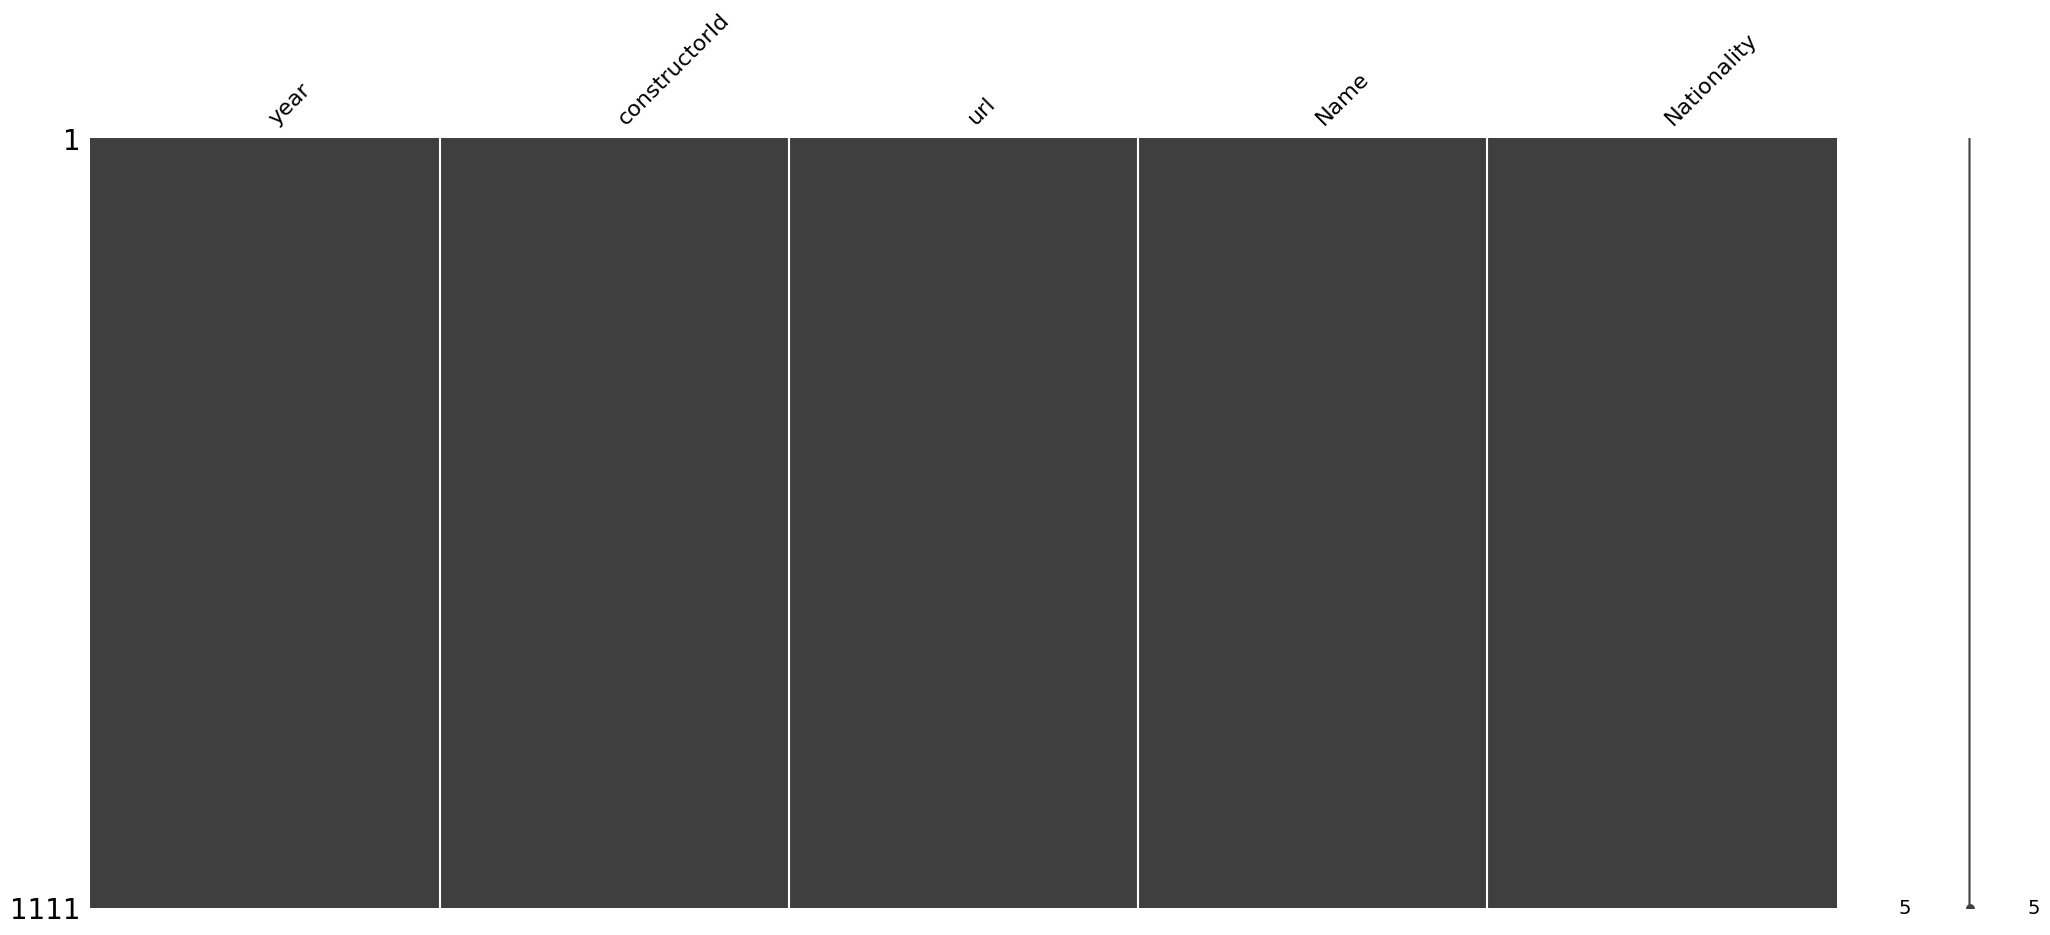

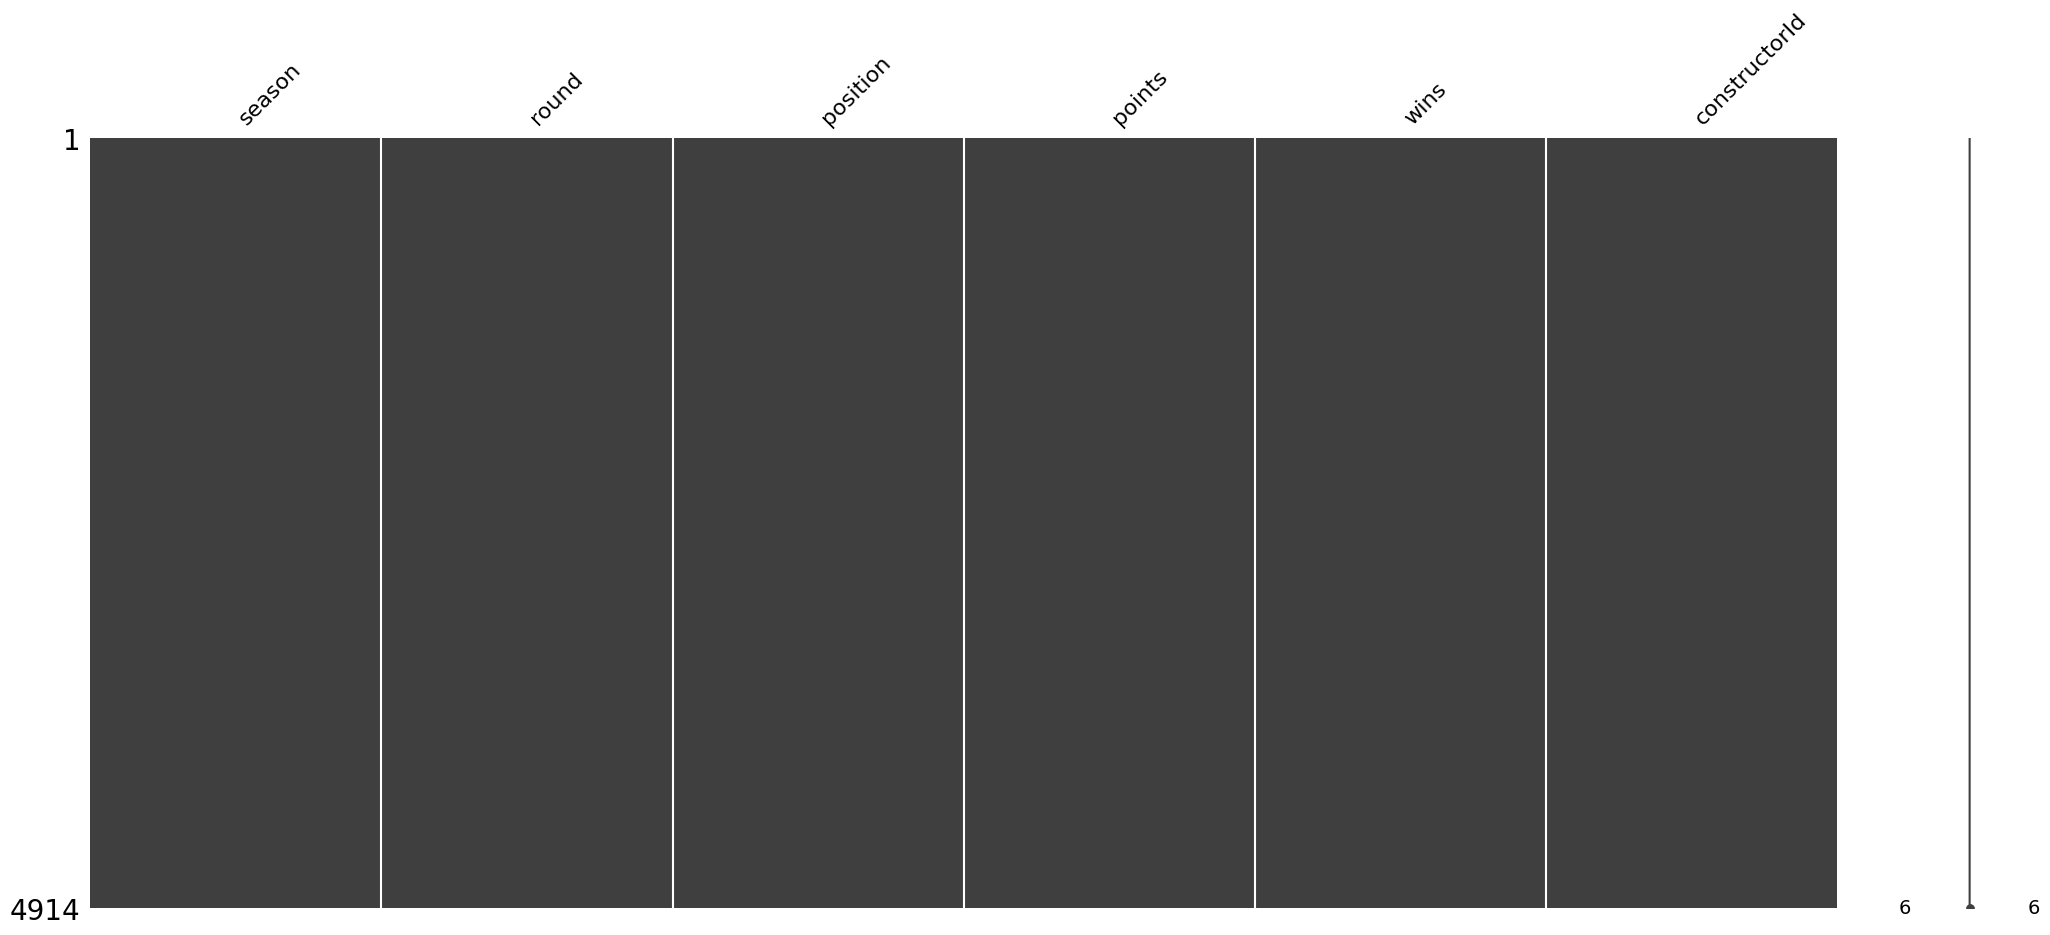

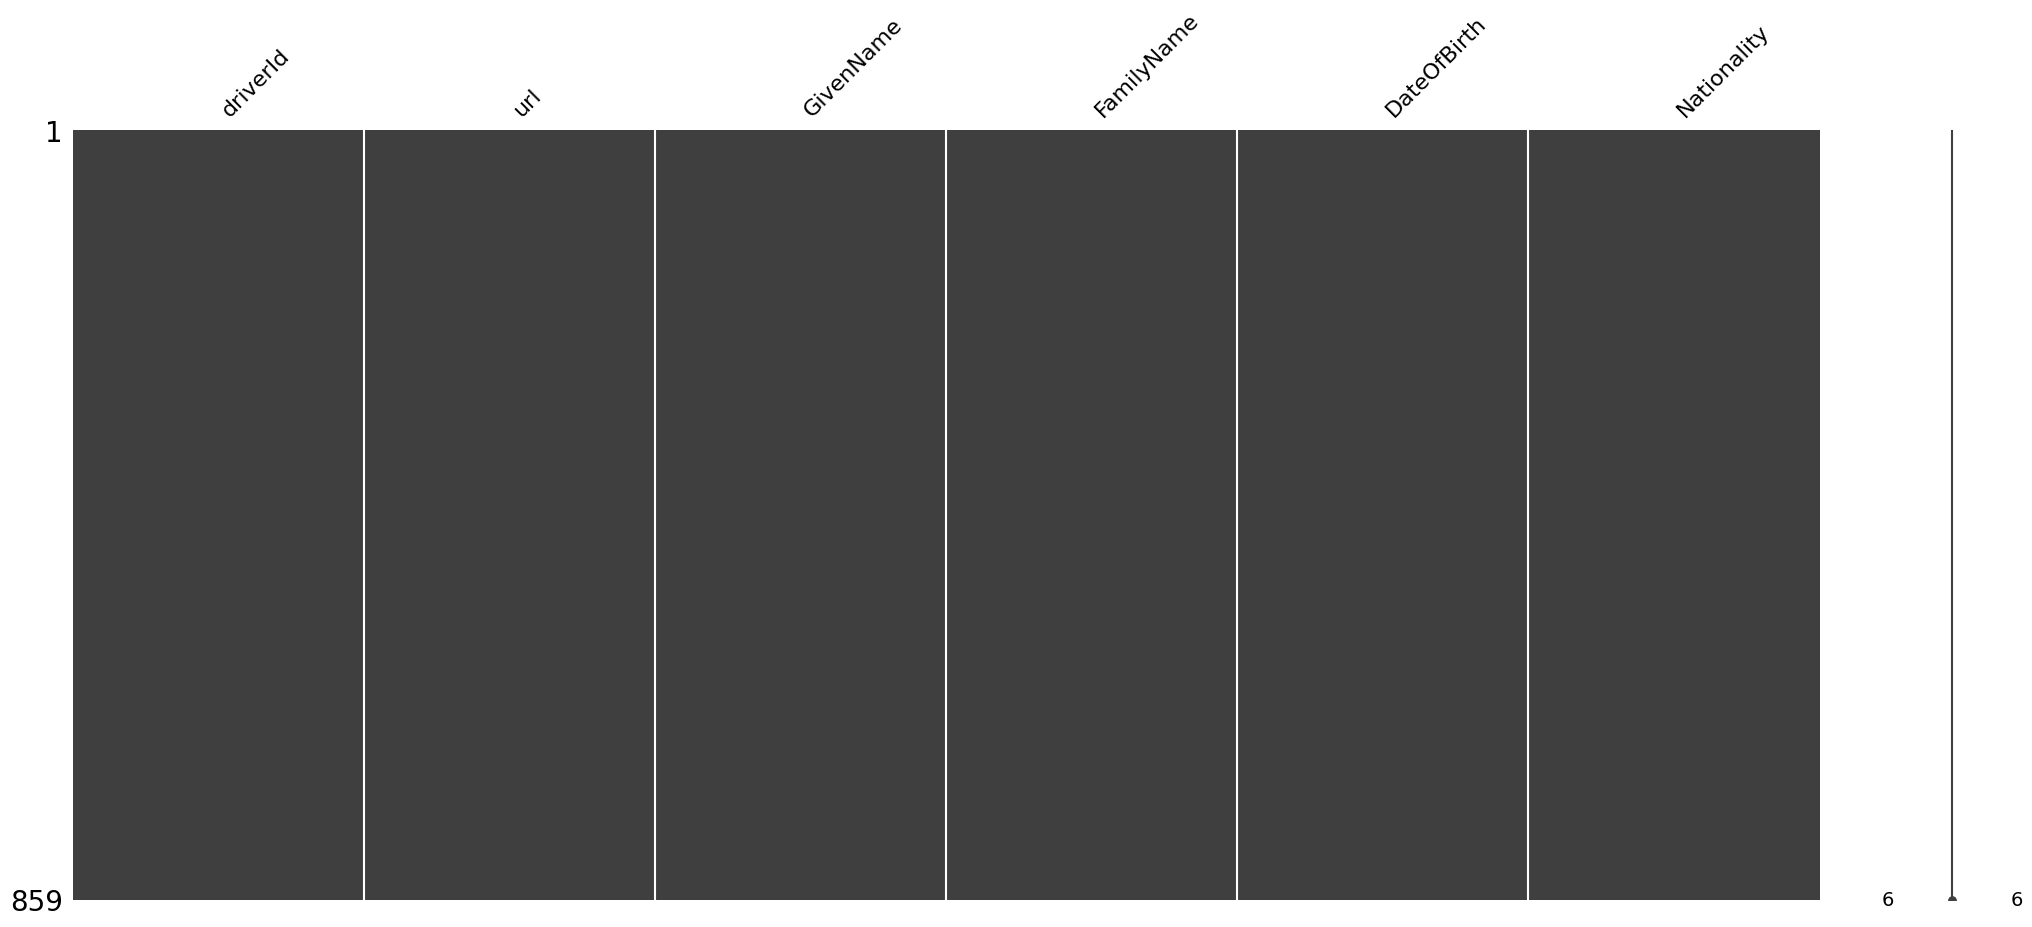

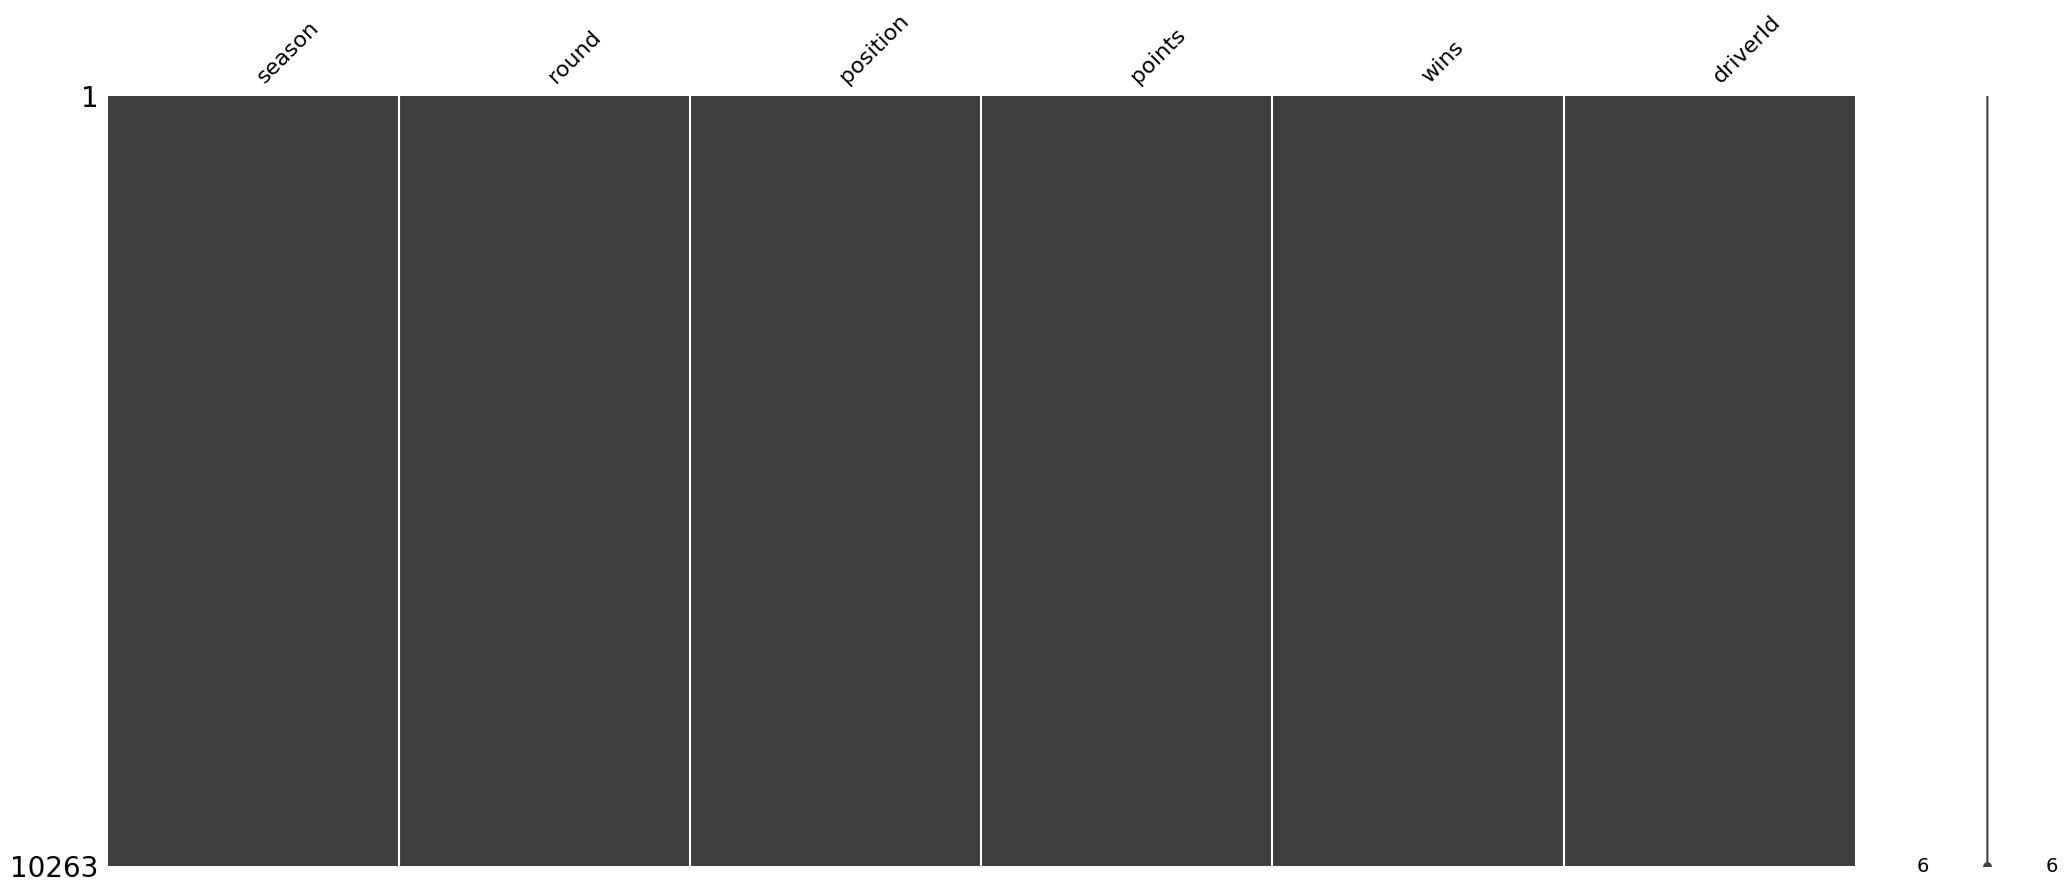

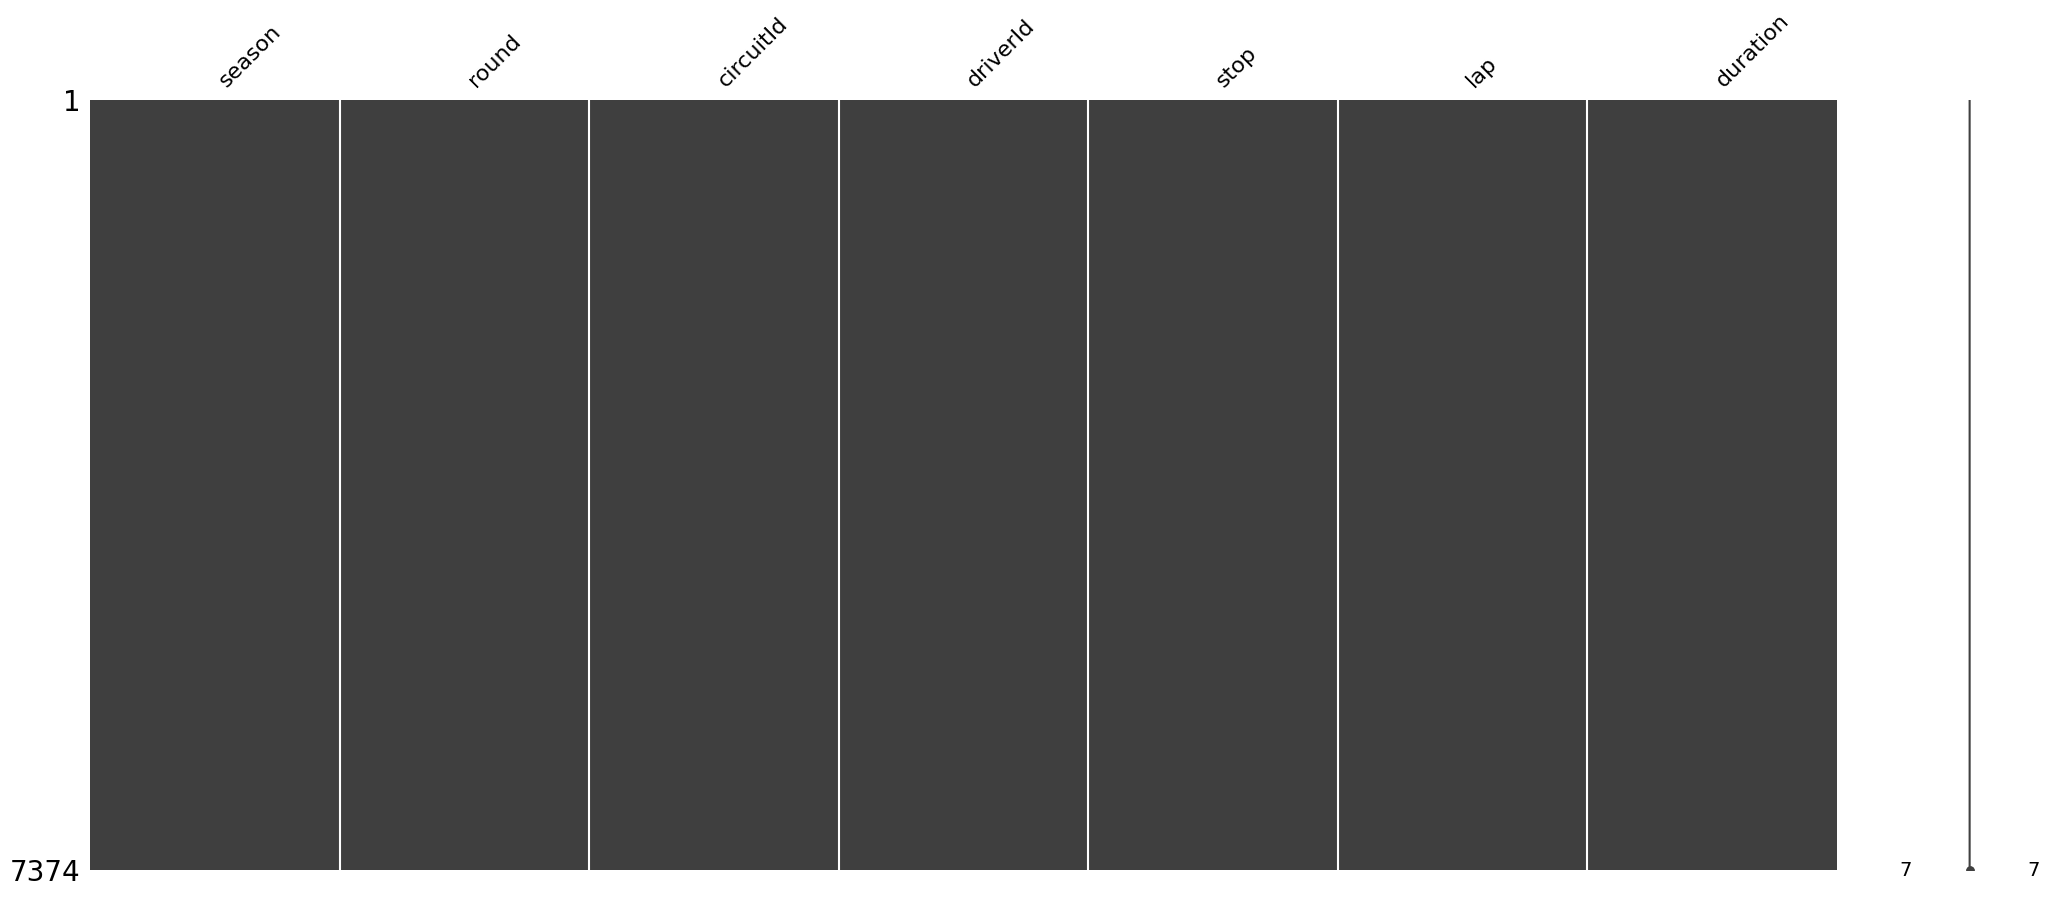

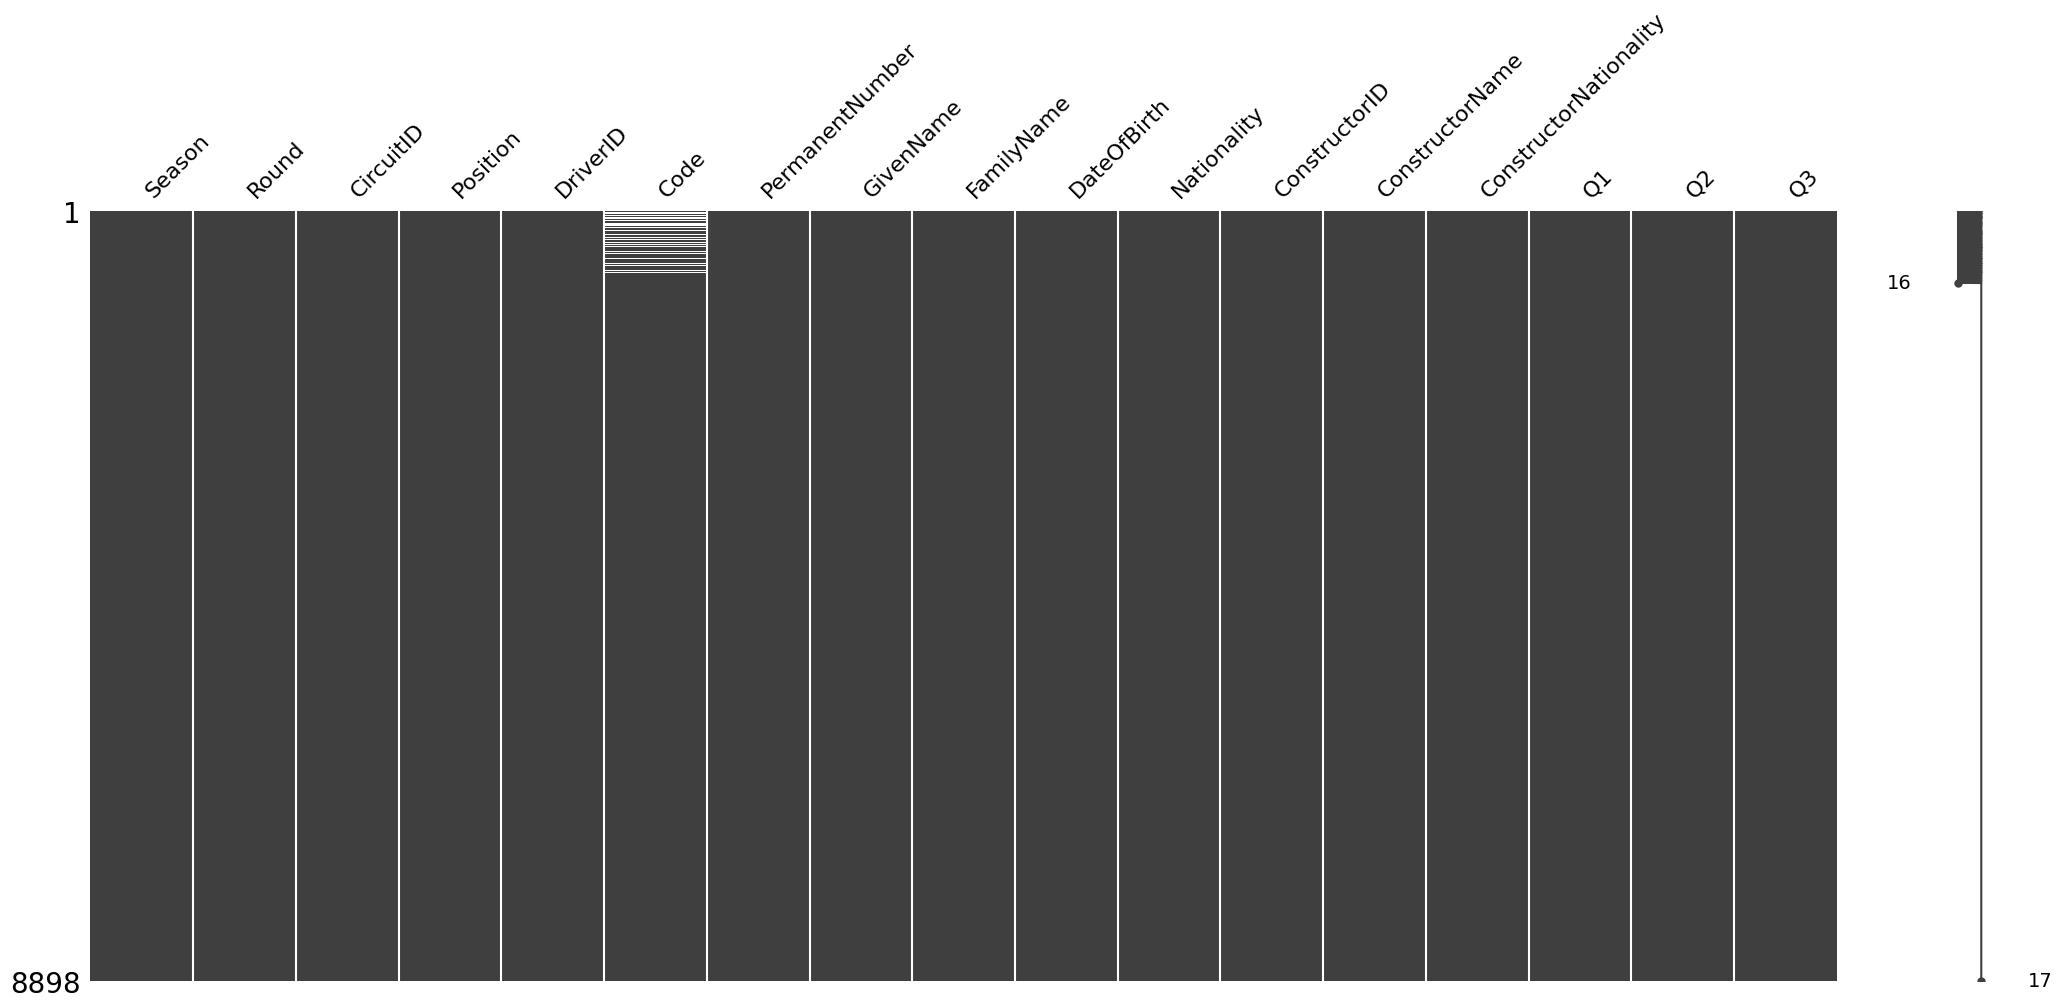

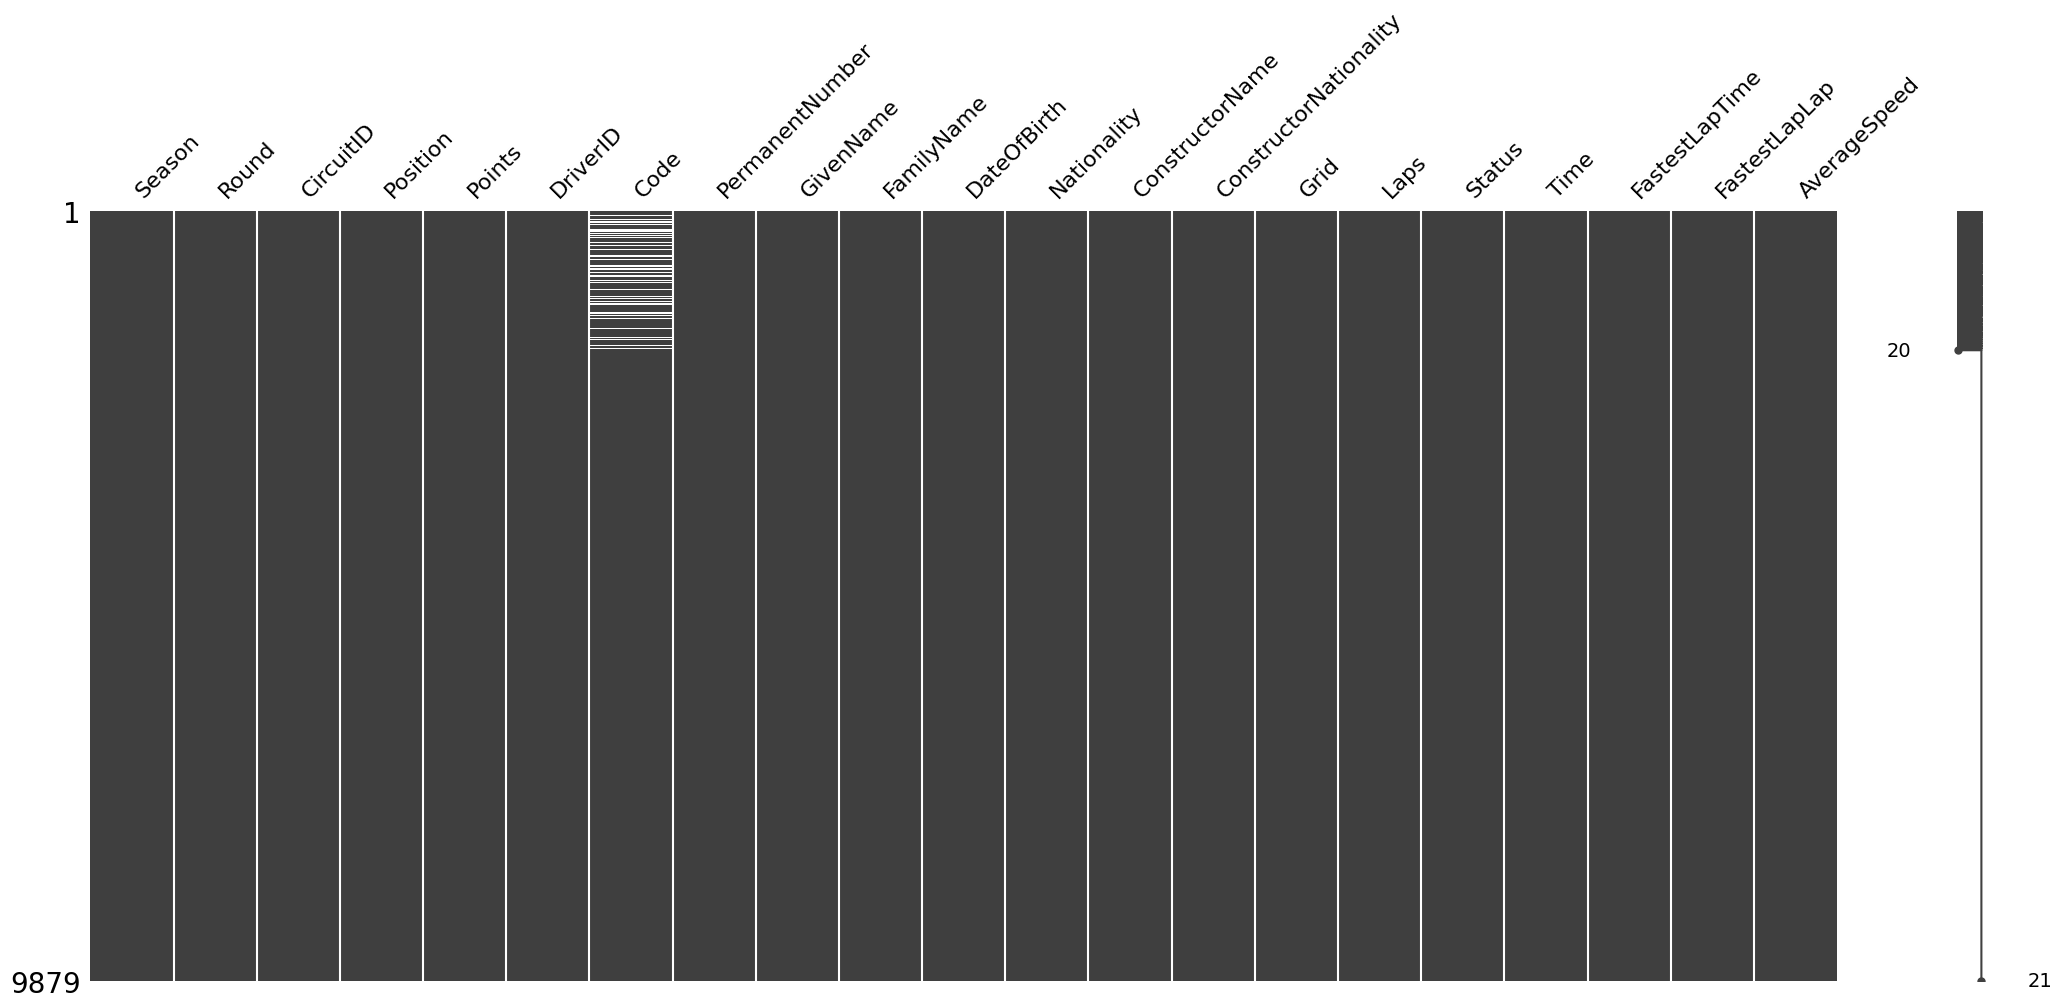

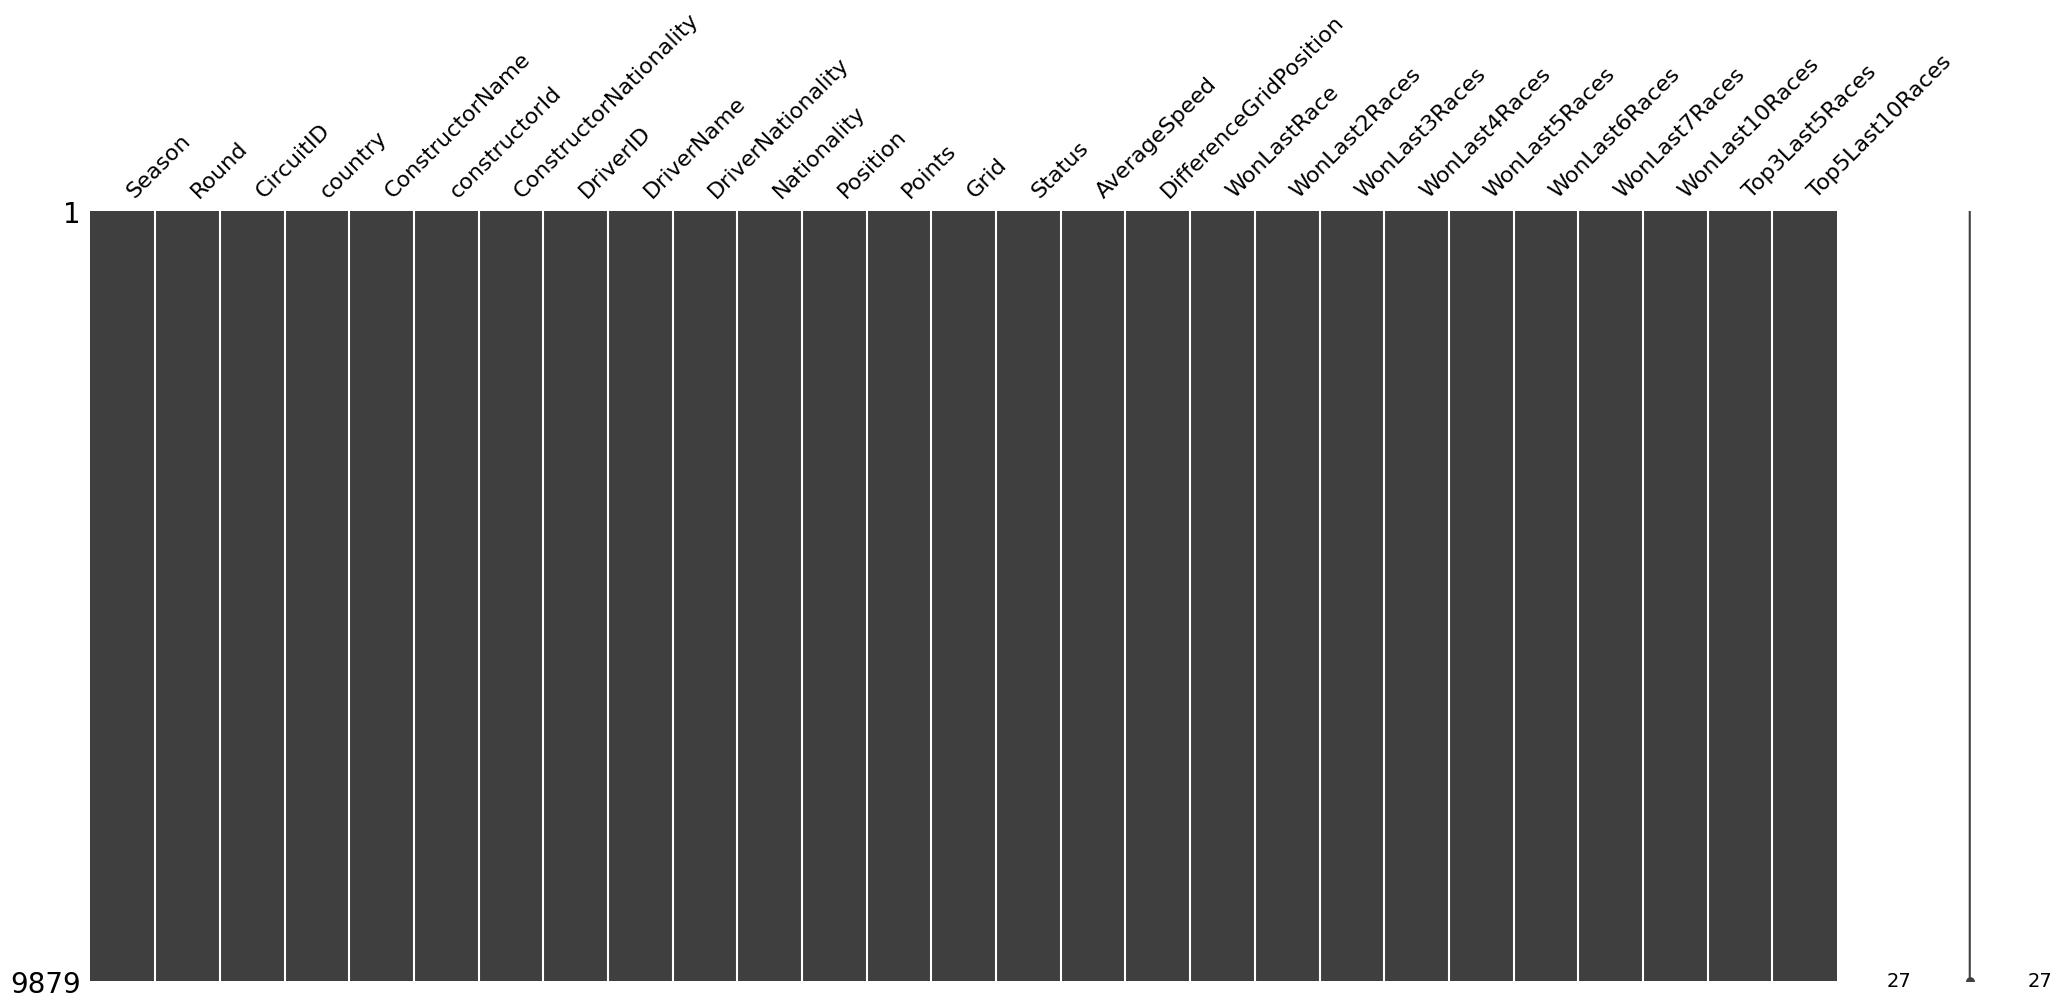

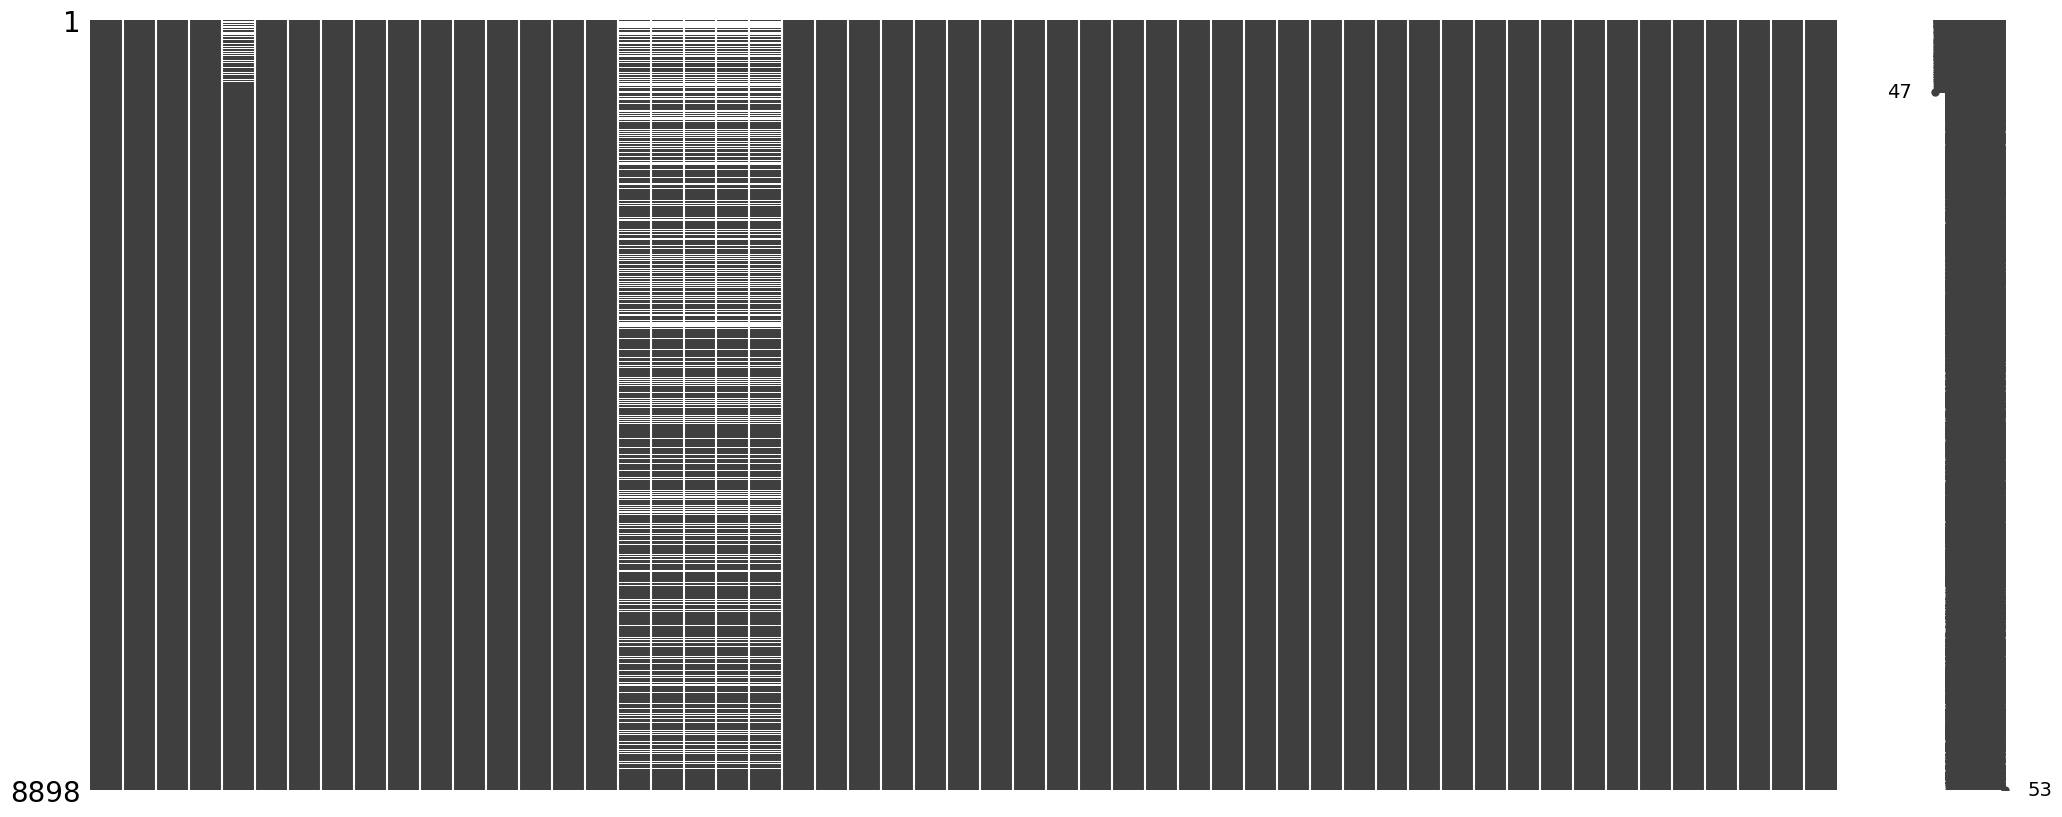

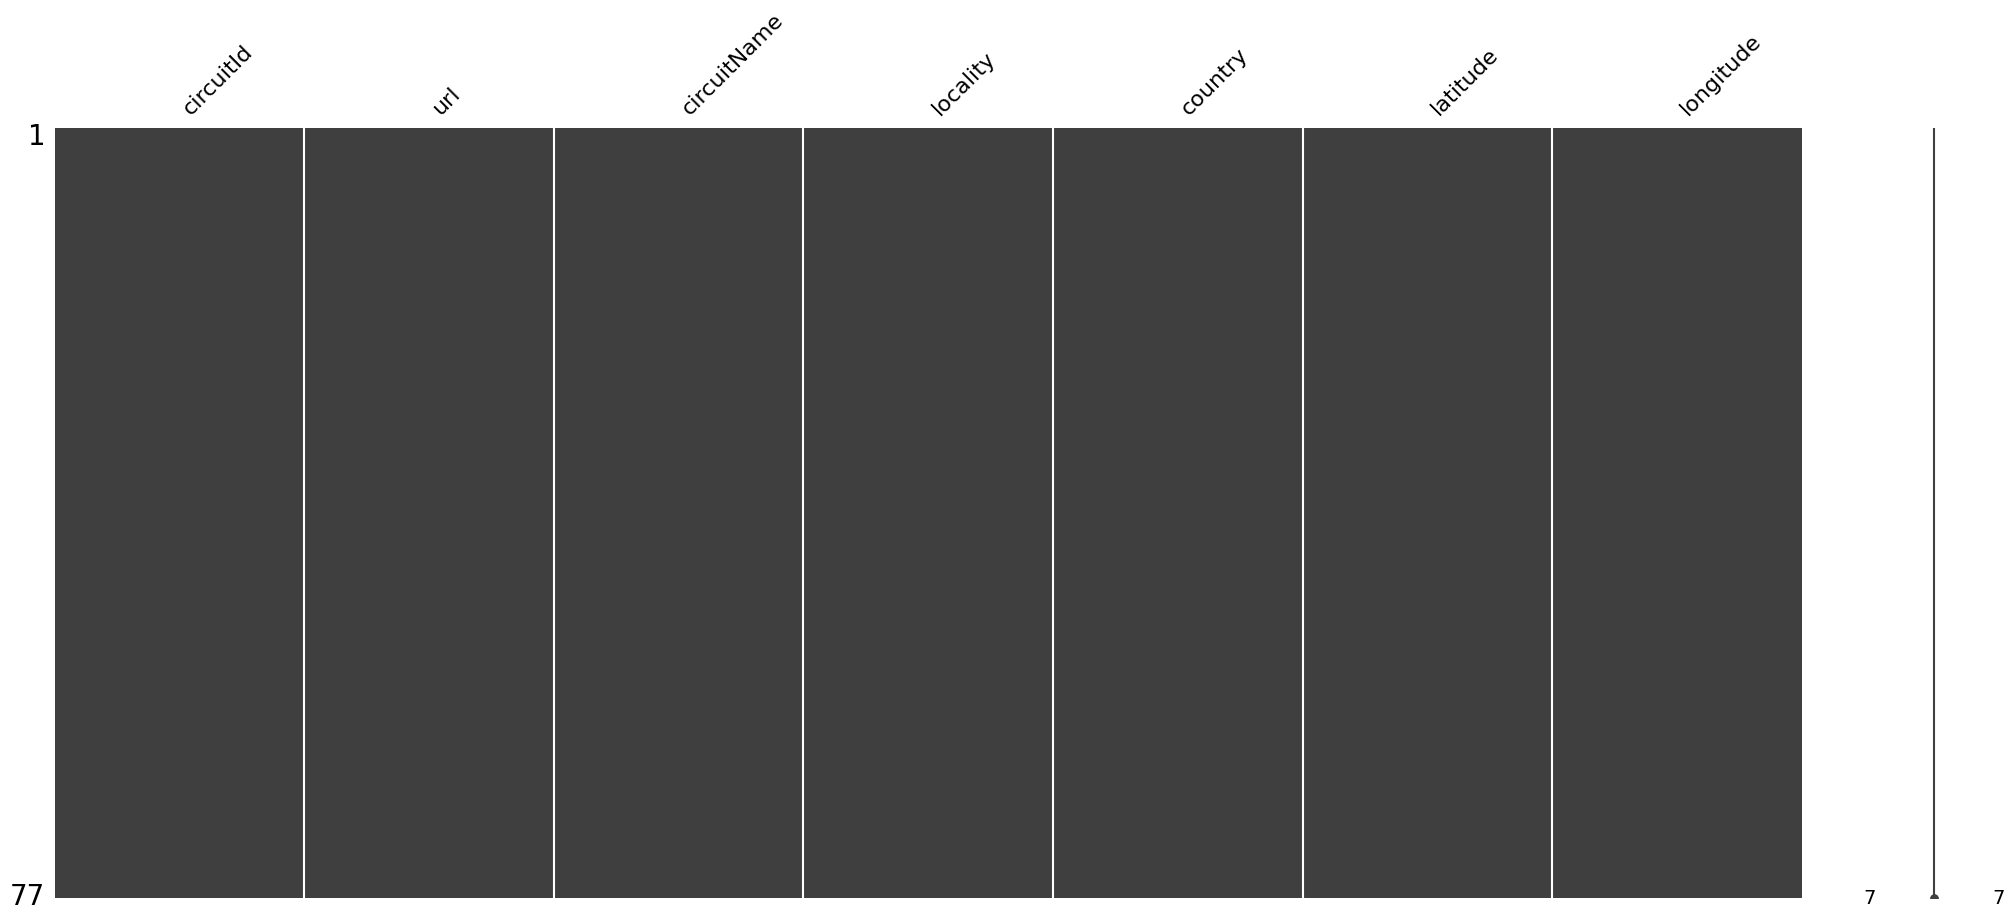

In [59]:
#plot msno matrix para validar el porcentaje de datos faltantes
#hacemos un loop para que se genere un plot por cada dataframe
for df in dfs_csv:
    msno.matrix(dfs_csv[df])

# Data Cleaning

In [61]:
#DATA CLEANING
#convertimos todas las columnas date a datetime
df_drivers['DateOfBirth'] = pd.to_datetime(df_drivers['DateOfBirth'])
df_qualifying_results['DateOfBirth'] = pd.to_datetime(df_qualifying_results['DateOfBirth'])
df_results['DateOfBirth'] = pd.to_datetime(df_results['DateOfBirth'])

In [62]:
#Rellenamos los valores nulos de las columnas de resultados con 0
df_constructors.fillna('', inplace=True)
df_constructor_standings.fillna(0, inplace=True)
df_drivers.fillna('', inplace=True)
df_driver_standings.fillna(0, inplace=True)
df_pitstops.fillna(0, inplace=True)
df_qualifying_results.fillna(0, inplace=True)
df_results.fillna(0, inplace=True)
df_results_history.fillna(0, inplace=True)
df_results_qualy.fillna(0, inplace=True)
df_circuits.fillna('', inplace=True)


# EDA

In [75]:
df_results.columns

Index(['Season', 'Round', 'CircuitID', 'Position', 'Points', 'DriverID',
       'Code', 'PermanentNumber', 'GivenName', 'FamilyName', 'DateOfBirth',
       'Nationality', 'ConstructorName', 'ConstructorNationality', 'Grid',
       'Laps', 'Status', 'Time', 'FastestLapTime', 'FastestLapLap',
       'AverageSpeed'],
      dtype='object')

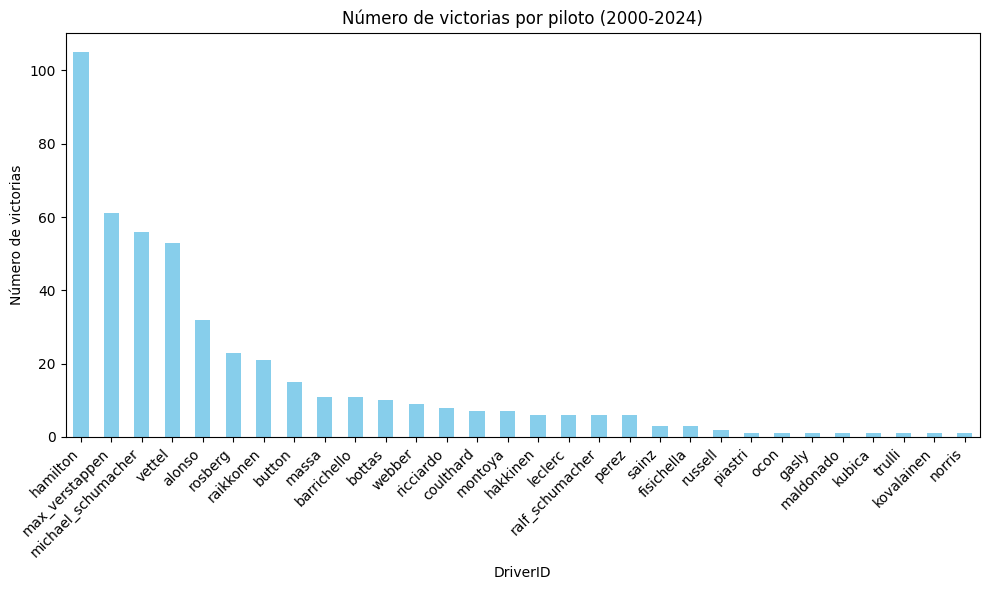

In [76]:
# con el dataframe df_results veamos el DriverID mas ganador por año con un grafico de barras
# hacemos el gráfico con matplotlib
# tomamos en cuenta la columna 'Position' = 1 y el 'Status' = 'Finished'
# Filtramos los datos
df_winners = df_results[(df_results['Position'] == 1) & 
                        (df_results['Status'] == 'Finished') & 
                        (df_results['Season'] >= 2000) & 
                        (df_results['Season'] <= 2024)]

# Contamos el número de victorias por piloto en el periodo 2000-2024
victories_by_driver = df_winners.groupby('DriverID')['DriverID'].count()

# Ordenamos los datos de mayor a menor para una mejor visualización
victories_by_driver = victories_by_driver.sort_values(ascending=False)

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
victories_by_driver.plot(kind='bar', color='skyblue')
plt.title('Número de victorias por piloto (2000-2024)')
plt.xlabel('DriverID')
plt.ylabel('Número de victorias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostramos el gráfico
plt.show()


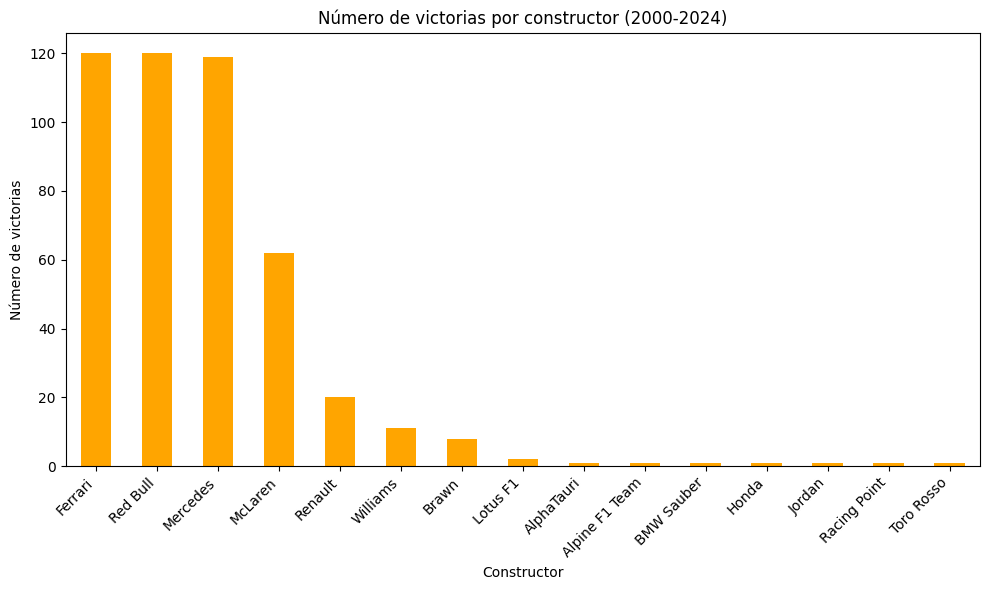

In [77]:
# Ahora vemos por constructor
# Filtramos los datos
df_winners_by_constructor = df_results[(df_results['Position'] == 1) & 
                                       (df_results['Status'] == 'Finished') & 
                                       (df_results['Season'] >= 2000) & 
                                       (df_results['Season'] <= 2024)]

# Contamos el número de victorias por constructor en el periodo 2000-2024
victories_by_constructor = df_winners_by_constructor.groupby('ConstructorName')['ConstructorName'].count()

# Ordenamos los datos de mayor a menor para una mejor visualización
victories_by_constructor = victories_by_constructor.sort_values(ascending=False)

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
victories_by_constructor.plot(kind='bar', color='orange')
plt.title('Número de victorias por constructor (2000-2024)')
plt.xlabel('Constructor')
plt.ylabel('Número de victorias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostramos el gráfico
plt.show()

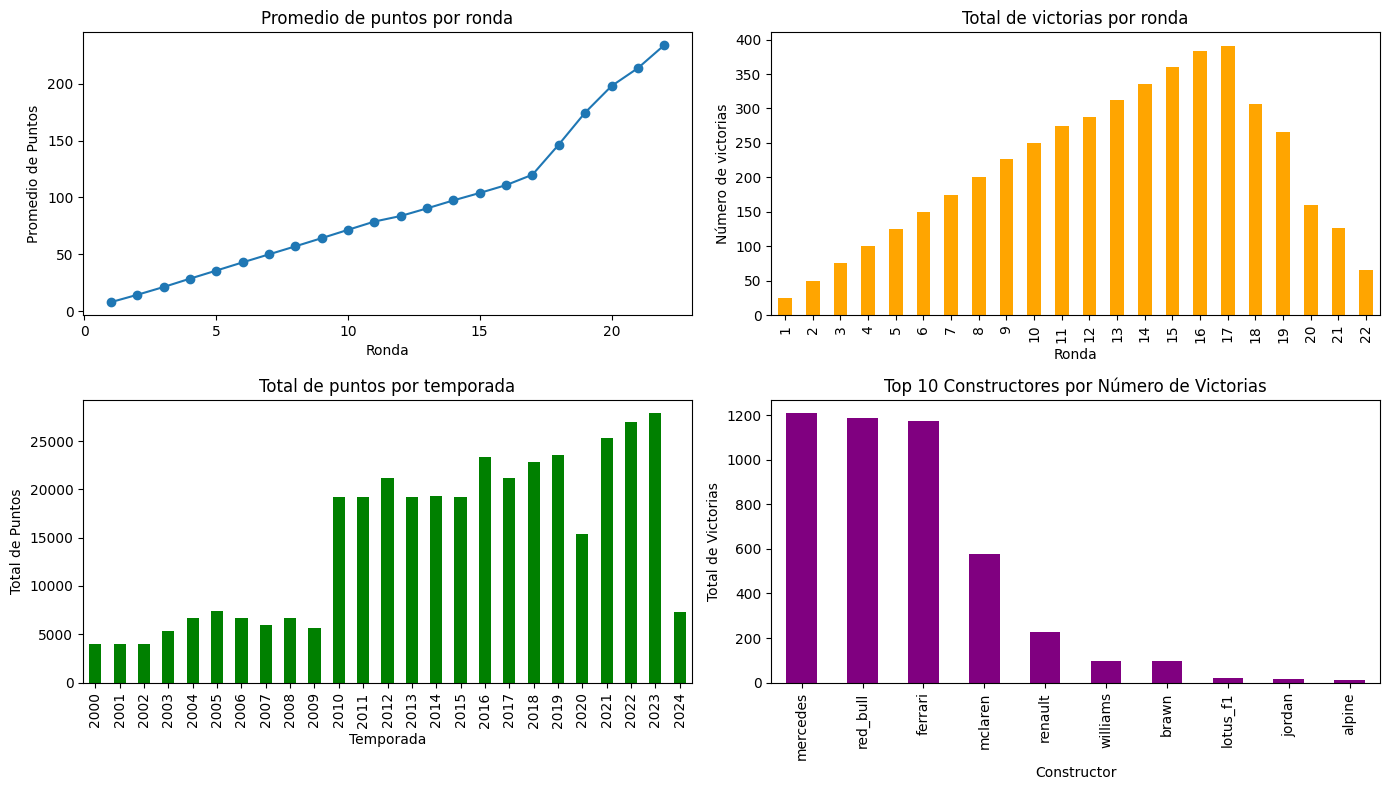

In [15]:
#necesito graficar Top 10 constructores por número de victorias usando df_constructor_standings

# Configuring the size of the plots
plt.figure(figsize=(14, 8))

# 1. Distribución de puntos a lo largo de las rondas en la temporada
plt.subplot(2, 2, 1)
df_constructor_standings.groupby('round')['points'].mean().plot(kind='line', marker='o')
plt.title('Promedio de puntos por ronda')
plt.xlabel('Ronda')
plt.ylabel('Promedio de Puntos')

# 2. Distribución de victorias a lo largo de las rondas en la temporada
plt.subplot(2, 2, 2)
df_constructor_standings.groupby('round')['wins'].sum().plot(kind='bar', color='orange')
plt.title('Total de victorias por ronda')
plt.xlabel('Ronda')
plt.ylabel('Número de victorias')

# 3. Distribución de puntos por temporada
plt.subplot(2, 2, 3)
df_constructor_standings.groupby('season')['points'].sum().plot(kind='bar', color='green')
plt.title('Total de puntos por temporada')
plt.xlabel('Temporada')
plt.ylabel('Total de Puntos')

# 4. Número de victorias por constructor en general
plt.subplot(2, 2, 4)
df_constructor_standings.groupby('constructorId')['wins'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Constructores por Número de Victorias')
plt.xlabel('Constructor')
plt.ylabel('Total de Victorias')

plt.tight_layout()
plt.show()


In [17]:
# Summary statistics to gather initial insights
df_driver_summary = df_driver_standings.describe()

# Checking for any missing values in the dataset
missing_values_driver = df_driver_standings.isnull().sum()

# Counting the unique drivers
unique_drivers = df_driver_standings['driverId'].nunique()

# Grouping by season and round to check the average points and wins per round
season_round_driver_group = df_driver_standings.groupby(['season', 'round']).agg({'points': 'mean', 'wins': 'sum'}).reset_index()

# Grouping by driver to check the total points and wins across all seasons
driver_performance = df_driver_standings.groupby('driverId').agg({'points': 'sum', 'wins': 'sum'}).reset_index()

df_driver_summary, missing_values_driver, unique_drivers, season_round_driver_group.head(), driver_performance.sort_values(by='points', ascending=False).head()


(             season         round      position        points          wins
 count  10263.000000  10263.000000  10263.000000  10263.000000  10263.000000
 mean    2012.186690     10.261327     11.656338     35.854185      0.452597
 std        6.964315      5.543147      6.576350     60.839872      1.465869
 min     2000.000000      1.000000      1.000000      0.000000      0.000000
 25%     2006.000000      6.000000      6.000000      1.000000      0.000000
 50%     2012.000000     10.000000     12.000000     10.000000      0.000000
 75%     2018.000000     15.000000     17.000000     43.000000      0.000000
 max     2024.000000     22.000000     28.000000    575.000000     19.000000,
 season      0
 round       0
 position    0
 points      0
 wins        0
 driverId    0
 dtype: int64,
 123,
    season  round    points  wins
 0    2000      1  2.888889     1
 1    2000      2  3.466667     2
 2    2000      3  3.714286     3
 3    2000      4  4.727273     4
 4    2000      5  5.9090

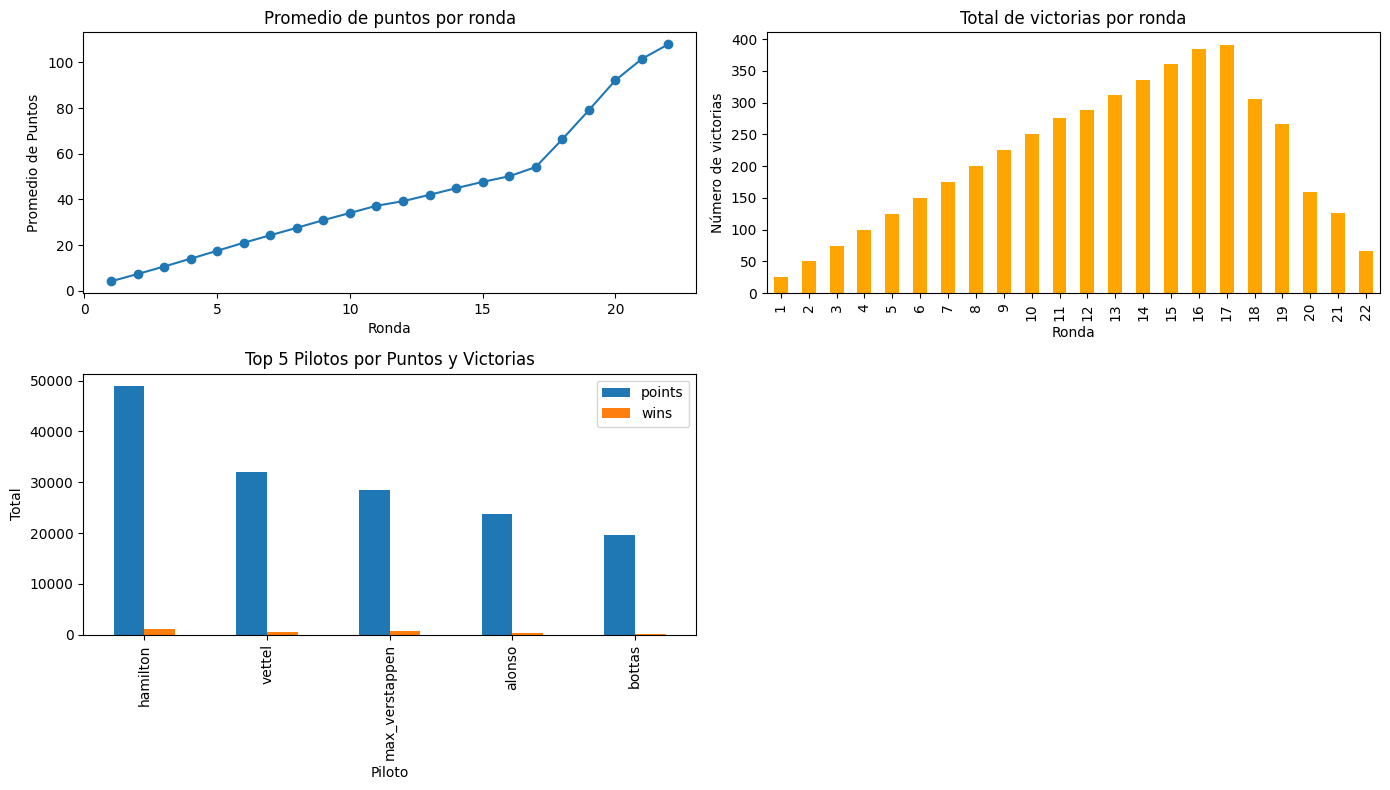

In [18]:
# Configuring the size of the plots
plt.figure(figsize=(14, 8))

# 1. Distribución de puntos a lo largo de las rondas en la temporada
plt.subplot(2, 2, 1)
df_driver_standings.groupby('round')['points'].mean().plot(kind='line', marker='o')
plt.title('Promedio de puntos por ronda')
plt.xlabel('Ronda')
plt.ylabel('Promedio de Puntos')

# 2. Distribución de victorias a lo largo de las rondas en la temporada
plt.subplot(2, 2, 2)
df_driver_standings.groupby('round')['wins'].sum().plot(kind='bar', color='orange')
plt.title('Total de victorias por ronda')
plt.xlabel('Ronda')
plt.ylabel('Número de victorias')

# 3. Total de puntos y victorias de los pilotos más exitosos
plt.subplot(2, 2, 3)
top_5_drivers = driver_performance.sort_values(by='points', ascending=False).head(5)
top_5_drivers.plot(kind='bar', x='driverId', y=['points', 'wins'], ax=plt.gca())
plt.title('Top 5 Pilotos por Puntos y Victorias')
plt.xlabel('Piloto')
plt.ylabel('Total')

plt.tight_layout()
plt.show()


In [19]:
# Convert 'Time' and 'FastestLapTime' to appropriate time formats for analysis
def convert_time_to_seconds(time_str):
    try:
        min_sec = time_str.split(':')
        if len(min_sec) == 2:
            min = int(min_sec[0])
            sec = float(min_sec[1])
            return min * 60 + sec
        else:
            return float(time_str)
    except:
        return 0  # Handle cases where time is 0 or not available

df_results['Time_seconds'] = df_results['Time'].apply(convert_time_to_seconds)
df_results['FastestLapTime_seconds'] = df_results['FastestLapTime'].apply(convert_time_to_seconds)

# Summary statistics to gather initial insights on key columns
key_columns_results = ['Points', 'Grid', 'Laps', 'Time_seconds', 'FastestLapTime_seconds', 'AverageSpeed']
df_results_summary = df_results[key_columns_results].describe()

# Checking for any missing values in the dataset
missing_values_results = df_results.isnull().sum()

# Counting the unique drivers and constructors
unique_drivers_results = df_results['DriverID'].nunique()
unique_constructors_results = df_results['ConstructorName'].nunique()

# Grouping by season to check average points and positions
season_results_group = df_results.groupby('Season').agg({
    'Points': 'mean',
    'Grid': 'mean',
    'AverageSpeed': 'mean'
}).reset_index()

df_results_summary, missing_values_results[key_columns_results], unique_drivers_results, unique_constructors_results, season_results_group.head()


(            Points         Grid         Laps  Time_seconds  \
 count  9879.000000  9879.000000  9879.000000   9879.000000   
 mean      3.649357    10.916793    52.089078     18.090854   
 std       6.113076     6.193476    19.258043     27.977976   
 min       0.000000     0.000000     0.000000      0.000000   
 25%       0.000000     6.000000    50.000000      0.000000   
 50%       0.000000    11.000000    56.000000      0.000000   
 75%       6.000000    16.000000    66.000000     32.367500   
 max      50.000000    24.000000    87.000000    207.071000   
 
        FastestLapTime_seconds  AverageSpeed  
 count             9879.000000   9879.000000  
 mean                74.129906    166.414171  
 std                 36.954030     81.383176  
 min                  0.000000      0.000000  
 25%                 75.144000    169.427000  
 50%                 85.996000    200.202000  
 75%                 97.534000    213.935000  
 max                202.300000    257.320000  ,
 Points

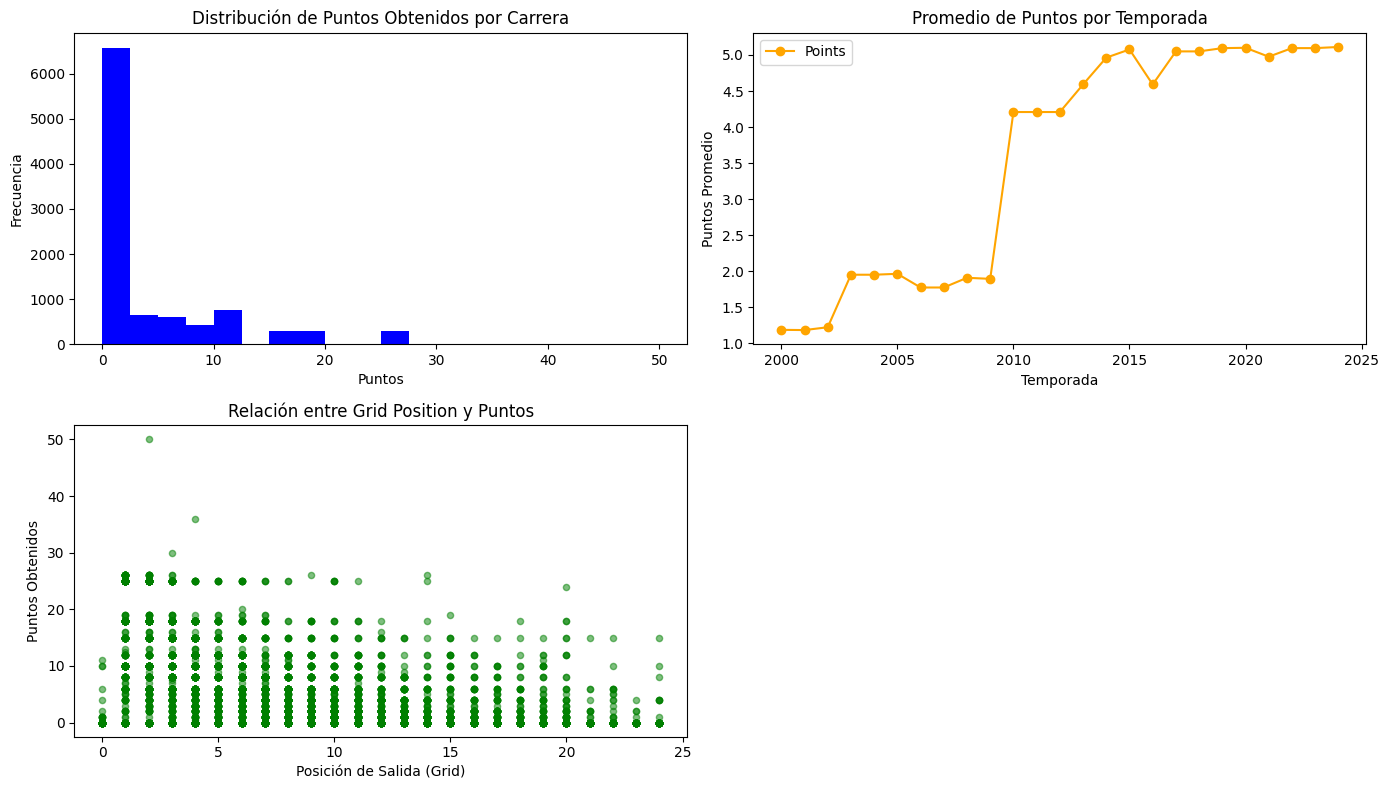

In [20]:
# Configuring the size of the plots
plt.figure(figsize=(14, 8))

# 1. Distribución de los puntos obtenidos por carrera
plt.subplot(2, 2, 1)
df_results['Points'].plot(kind='hist', bins=20, color='blue')
plt.title('Distribución de Puntos Obtenidos por Carrera')
plt.xlabel('Puntos')
plt.ylabel('Frecuencia')

# 2. Promedio de puntos por temporada
plt.subplot(2, 2, 2)
season_results_group.plot(kind='line', x='Season', y='Points', marker='o', color='orange', ax=plt.gca())
plt.title('Promedio de Puntos por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Puntos Promedio')

# 3. Relación entre Grid Position y Puntos
plt.subplot(2, 2, 3)
df_results.plot(kind='scatter', x='Grid', y='Points', alpha=0.5, color='green', ax=plt.gca())
plt.title('Relación entre Grid Position y Puntos')
plt.xlabel('Posición de Salida (Grid)')
plt.ylabel('Puntos Obtenidos')

plt.tight_layout()
plt.show()


In [21]:
# Function to convert duration in the format 'MM:SS.mmm' to seconds
def convert_duration_to_seconds(duration):
    try:
        minutes, seconds = duration.split(':')
        total_seconds = int(minutes) * 60 + float(seconds)
        return total_seconds
    except:
        return float(duration)  # In case the duration is already in seconds

df_pitstops['duration_seconds'] = df_pitstops['duration'].apply(convert_duration_to_seconds)

# Summary statistics to gather initial insights after conversion
df_pitstops_summary = df_pitstops['duration_seconds'].describe()

# Grouping by season to check the average pit stop duration
season_pitstop_group = df_pitstops.groupby('season').agg({'duration_seconds': 'mean'}).reset_index()

# Analyzing the distribution of the number of stops per race
stops_per_race = df_pitstops.groupby(['season', 'round', 'driverId']).agg({'stop': 'max'}).reset_index()

df_pitstops_summary, season_pitstop_group.head(), stops_per_race.head()

(count    7374.000000
 mean       76.854925
 std       296.396765
 min        12.897000
 25%        22.112000
 50%        23.734000
 75%        26.757750
 max      3069.017000
 Name: duration_seconds, dtype: float64,
    season  duration_seconds
 0    2011         25.587868
 1    2012         23.254007
 2    2013         24.498330
 3    2014         70.063289
 4    2015         25.922231,
    season  round     driverId  stop
 0    2011      1  alguersuari     2
 1    2011      1       alonso     2
 2    2011      1     ambrosio     1
 3    2011      1  barrichello     3
 4    2011      1        buemi     2)

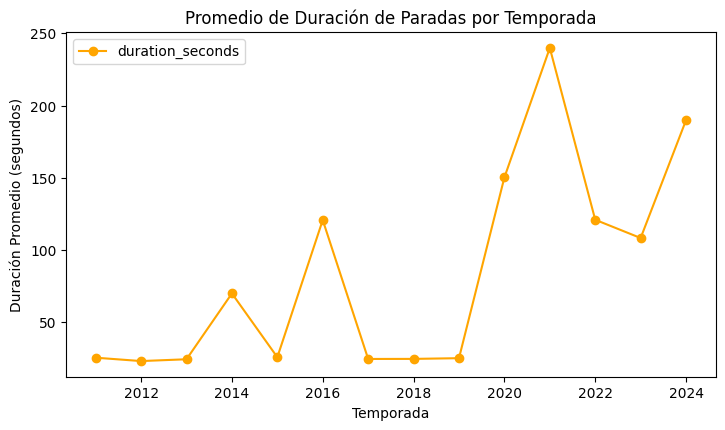

In [23]:
# Configuring the size of the plots
plt.figure(figsize=(14, 8))



# 2. Promedio de duración de paradas por temporada
plt.subplot(2, 2, 2)
season_pitstop_group.plot(kind='line', x='season', y='duration_seconds', marker='o', color='orange', ax=plt.gca())
plt.title('Promedio de Duración de Paradas por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Duración Promedio (segundos)')



plt.tight_layout()
plt.show()


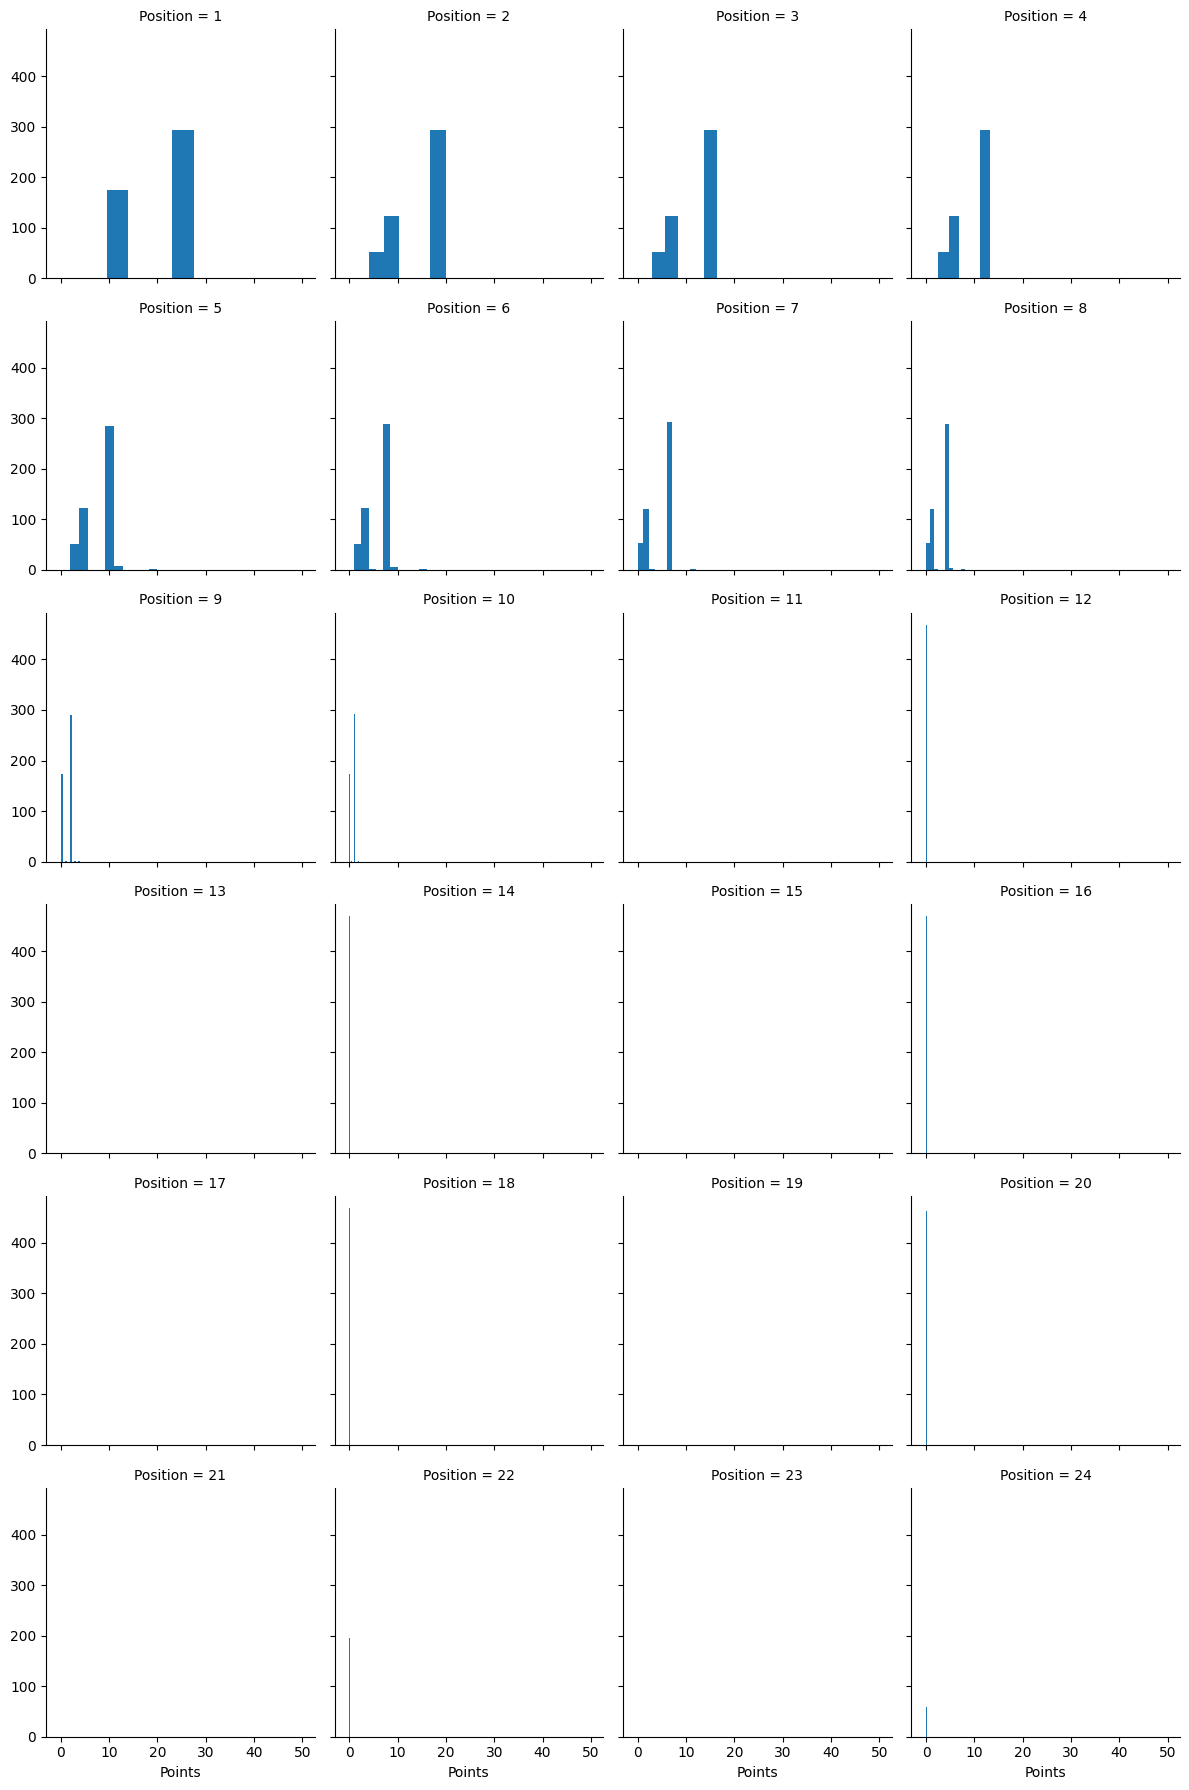

In [63]:
#vemos que los datos son bastante completos, por lo que no es necesario hacer imputaciones
#hacemos gráficos univariados para detectar patrones iniciales
g = sns.FacetGrid(df_results_history, col='Position', col_wrap=4)
g.map(plt.hist, 'Points')

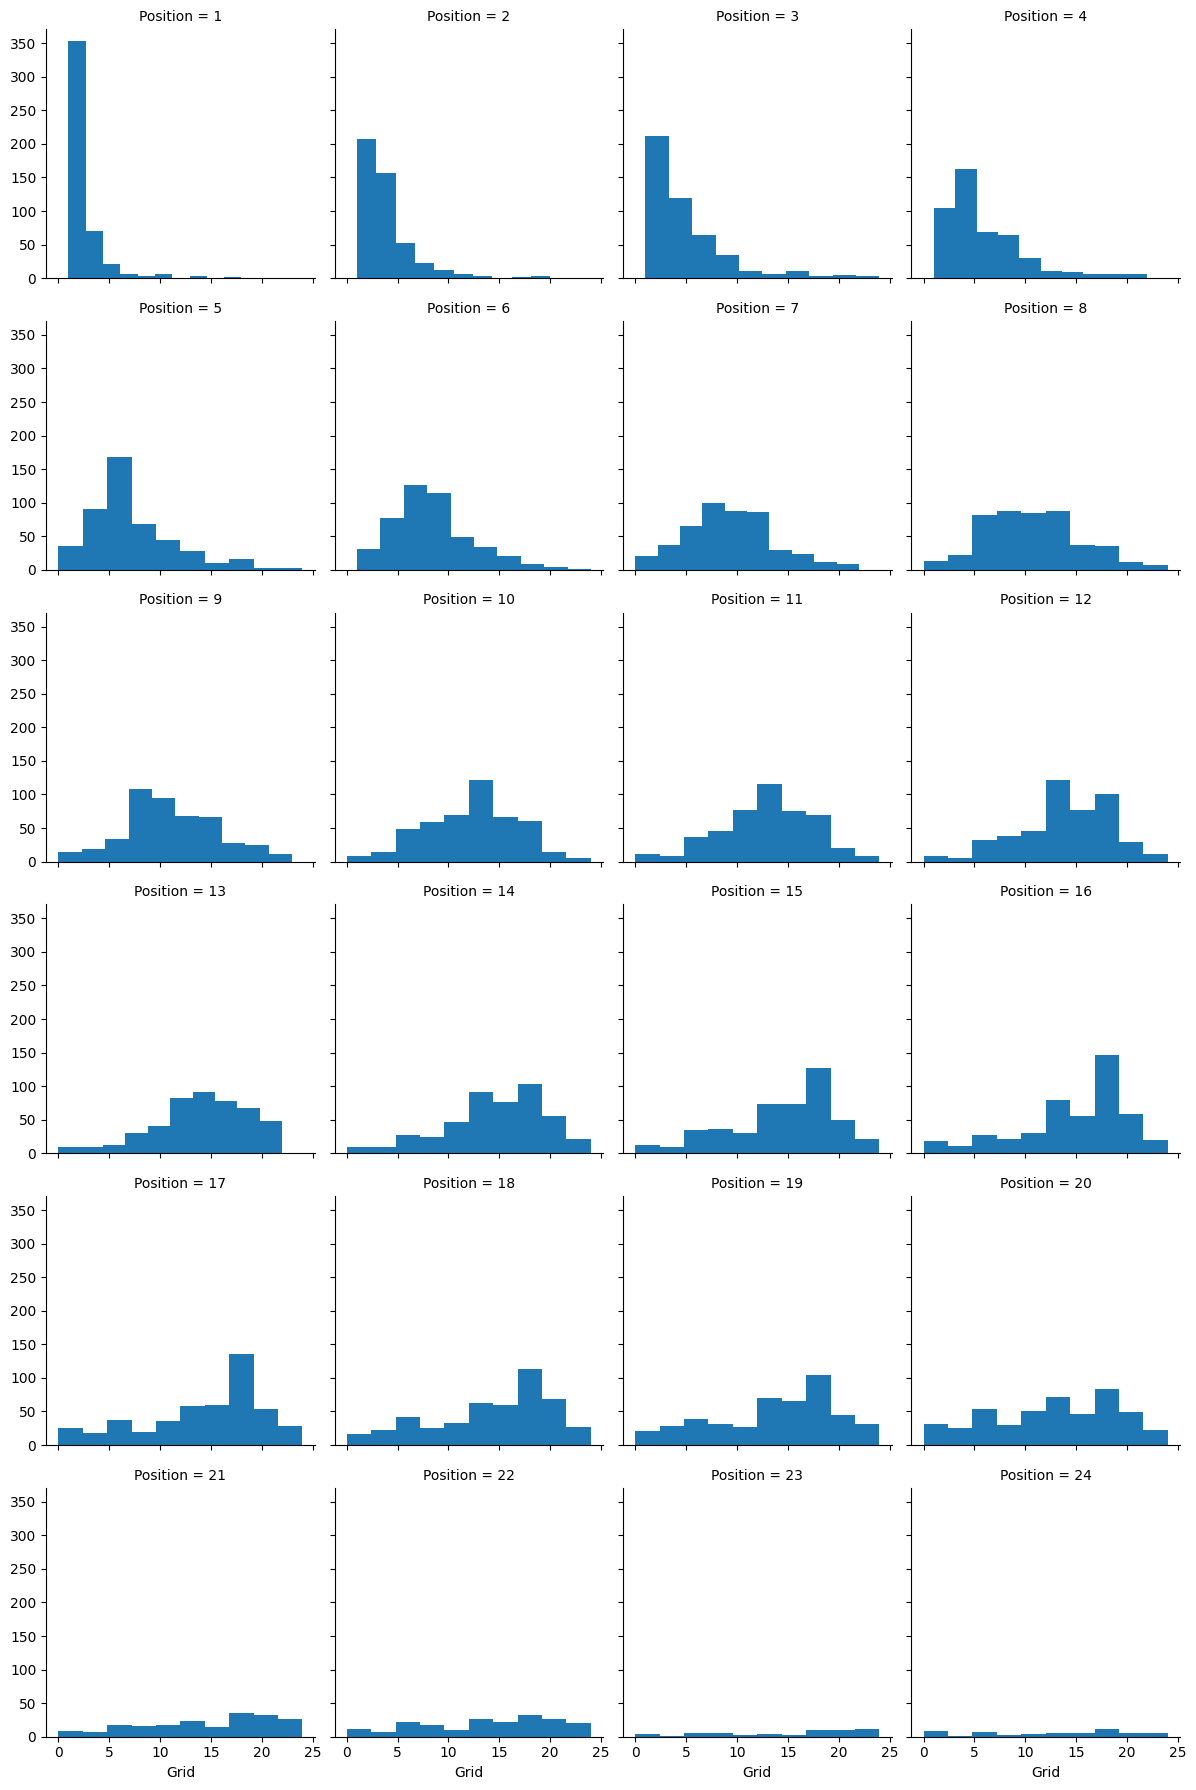

In [7]:
g = sns.FacetGrid(df_results, col='Position', col_wrap=4)
g.map(plt.hist, 'Grid')

In [79]:
#creo un csv con df_circuits
df_circuits.to_csv('data/circuits.csv', index=False)